**Goal of the notebook** : 

A familiarization with Seattle's environmental data in order to implement prediction models targeting 2 features of non-residential buildings :
- Greenhouses gases emissions.
- The total consumption of energy.

The prediction models must only use buildings' characteristics as entry.


**Table of contents**<a id='toc0_'></a>    
- 1. [Opening the data set](#toc1_)    
  - 1.1. [Missing values](#toc1_1_)    
  - 1.2. [ astype category](#toc1_2_)    
  - 1.3. [Identifying what seems reliable in the data set](#toc1_3_)    
- 2. [Univariate analysis and some cleansing.](#toc2_)    
  - 2.1. [Building Type](#toc2_1_)    
  - 2.2. [Primary Property Type](#toc2_2_)    
  - 2.3. [Zip Code](#toc2_3_)    
  - 2.4. [CouncilDistrictCode](#toc2_4_)    
  - 2.5. [Year Built (or complete renovation)](#toc2_5_)    
  - 2.6. [Neighborhood](#toc2_6_)    
  - 2.7. [Number of Buildings in the property](#toc2_7_)    
  - 2.8. [Number of floors](#toc2_8_)    
  - 2.9. [Property GFA Building(s)](#toc2_9_)    
  - 2.10. [ENERGYSTAR Score](#toc2_10_)    
  - 2.11. [Largest Property Use Type](#toc2_11_)    
    - 2.11.1. [Searching to reinforce the non-residential properties selection](#toc2_11_1_)    
    - 2.11.2. [Exploring what remains in 'Other' and 'Mixed Use Property'](#toc2_11_2_)    
  - 2.12. [SiteEUI(kBtu/sf)](#toc2_12_)    
  - 2.13. [SiteEUIWN(kBtu/sf)](#toc2_13_)    
  - 2.14. [SourceEUI(kBtu/sf)](#toc2_14_)    
  - 2.15. [SourceEUIWN(kBtu/sf)](#toc2_15_)    
  - 2.16. [SiteEnergyUse(kBtu)](#toc2_16_)    
  - 2.17. [SiteEnergyUseWN(kBtu)](#toc2_17_)    
  - 2.18. [SteamUse](#toc2_18_)    
  - 2.19. [Electricity(kWh) and (kBtu)](#toc2_19_)    
  - 2.20. [NaturalGas(kBtu)](#toc2_20_)    
  - 2.21. [TotalGHGEmissions](#toc2_21_)    
  - 2.22. [GHGEmissionsIntensity](#toc2_22_)    
- 3. [Bivariate analysis](#toc3_)    
  - 3.1. [Location of the properties](#toc3_1_)    
    - 3.1.1. [By primary type](#toc3_1_1_)    
    - 3.1.2. [ By ZipCode -- and checking geographical consistency](#toc3_1_2_)    
    - 3.1.3. [By CouncilDisctrictCode](#toc3_1_3_)    
    - 3.1.4. [Properties' locations and EUI slices](#toc3_1_4_)    
    - 3.1.5. [Properties' locations and GHGEmissionsIntensity slices](#toc3_1_5_)    
  - 3.2. [Targets and district code correlation](#toc3_2_)    
  - 3.3. [Targets and primary type correlation](#toc3_3_)    
  - 3.4. [Targets and number of floors correlation](#toc3_4_)    
  - 3.5. [Targets and number of floors correlation](#toc3_5_)    
- 4. [Features engineering](#toc4_)    
  - 4.1. [Buildings' age](#toc4_1_)    
  - 4.2. [Percentage of principal use type](#toc4_2_)    
- 5. [PCA](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)

# HELPER FUNCTIONS

def neighborhood_correction(data):
    """ formatting strings """
    pass

def number_of_buildings_correction(data):
    """ 0 impossible """
    pass

def number_of_floors_correction(data):
    """ 0 impossible """
    pass

def percentage_primary_type_use_threshold_choice(data):
    """  should not be superior to 1"""
    pass

def dtypes_optimization(data):
    # Categorization
    categories = ['BuildingType',
                  'PrimaryPropertyType',
                  'City',
                  'State',
                  'Neighborhood',
                  'ComplianceStatus']

    data.loc[:, categories] = (data.loc[:, categories]
                               .apply(lambda x: x.astype('category'), axis=0))
    
    # Integers    
    return data
### End of dtypes_optimization

def selecting_non_residential_buildings(data):
    """ Filtering on BuildingType and PrimaryPropertyType """
    # # BuildingType
    # sel = ['NonResidential',
    #        'Nonresidential COS',
    #        'Campus',               
    #        'SPS-District K-12',    
    #        'Nonresidential WA']
    
    # sel2 = ['Senior Care Community',
    #         'College/University',
    #         'Hotel',
    #         'Residence Hall/Dormitory',
    #         'Parking',
    #         'Office']
    
    # mask = (data.BuildingType.isin(sel)) 
    #         # & (data.LargestPropertyUseType.isin(sel2)))
    
    # data = data.loc[mask, :]
    # # At this point, There are still some properties to discard.
    # # The ones which were not in sel but which have Multifamily Housing
    # # In the Largest Use.
    # data = data.loc[data.LargestPropertyUseType != 'Multifamily Housing']
    return data
    
def selecting_reliable_properties(data):
    """ Avoiding default values, non-compliant and missing data
    in ComplianceStatus"""
    data = data.loc[data.ComplianceStatus == 'Compliant', :]    
    return data

def data_cleansing(data):
    """  """
    data = data.drop('Comments', axis=1) # Hold no info
    selecting_reliable_properties(data)
    selecting_non_residential_buildings(data)
    
    
    return data

def chunk_list(l: list, chunk_size: int) -> list:
    return [l[n:n+chunk_size] for n in range(0, len(l), chunk_size)]


# 1.  [&#9650;](#toc0_) <a id='toc1_'></a>Opening the data set

Some info on the data set:

Seattle’s Building Energy Benchmarking and Reporting Program (SMC 22.920) requires owners of non-residential and multifamily buildings (20,000 square feet or larger) to track energy performance and annually report to the City of Seattle.This update to the benchmarking mandate was passed by Seattle City Council on February 29, 2016.

[data link](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy)

In [3]:
initial_data = pd.read_csv('./2016_Building_Energy_Benchmarking.csv',
                           index_col='OSEBuildingID')

data = initial_data.copy()
display(data.head())
data.shape

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


(3376, 45)

## 1.1.  [&#9650;](#toc0_) <a id='toc1_1_'></a>Missing values

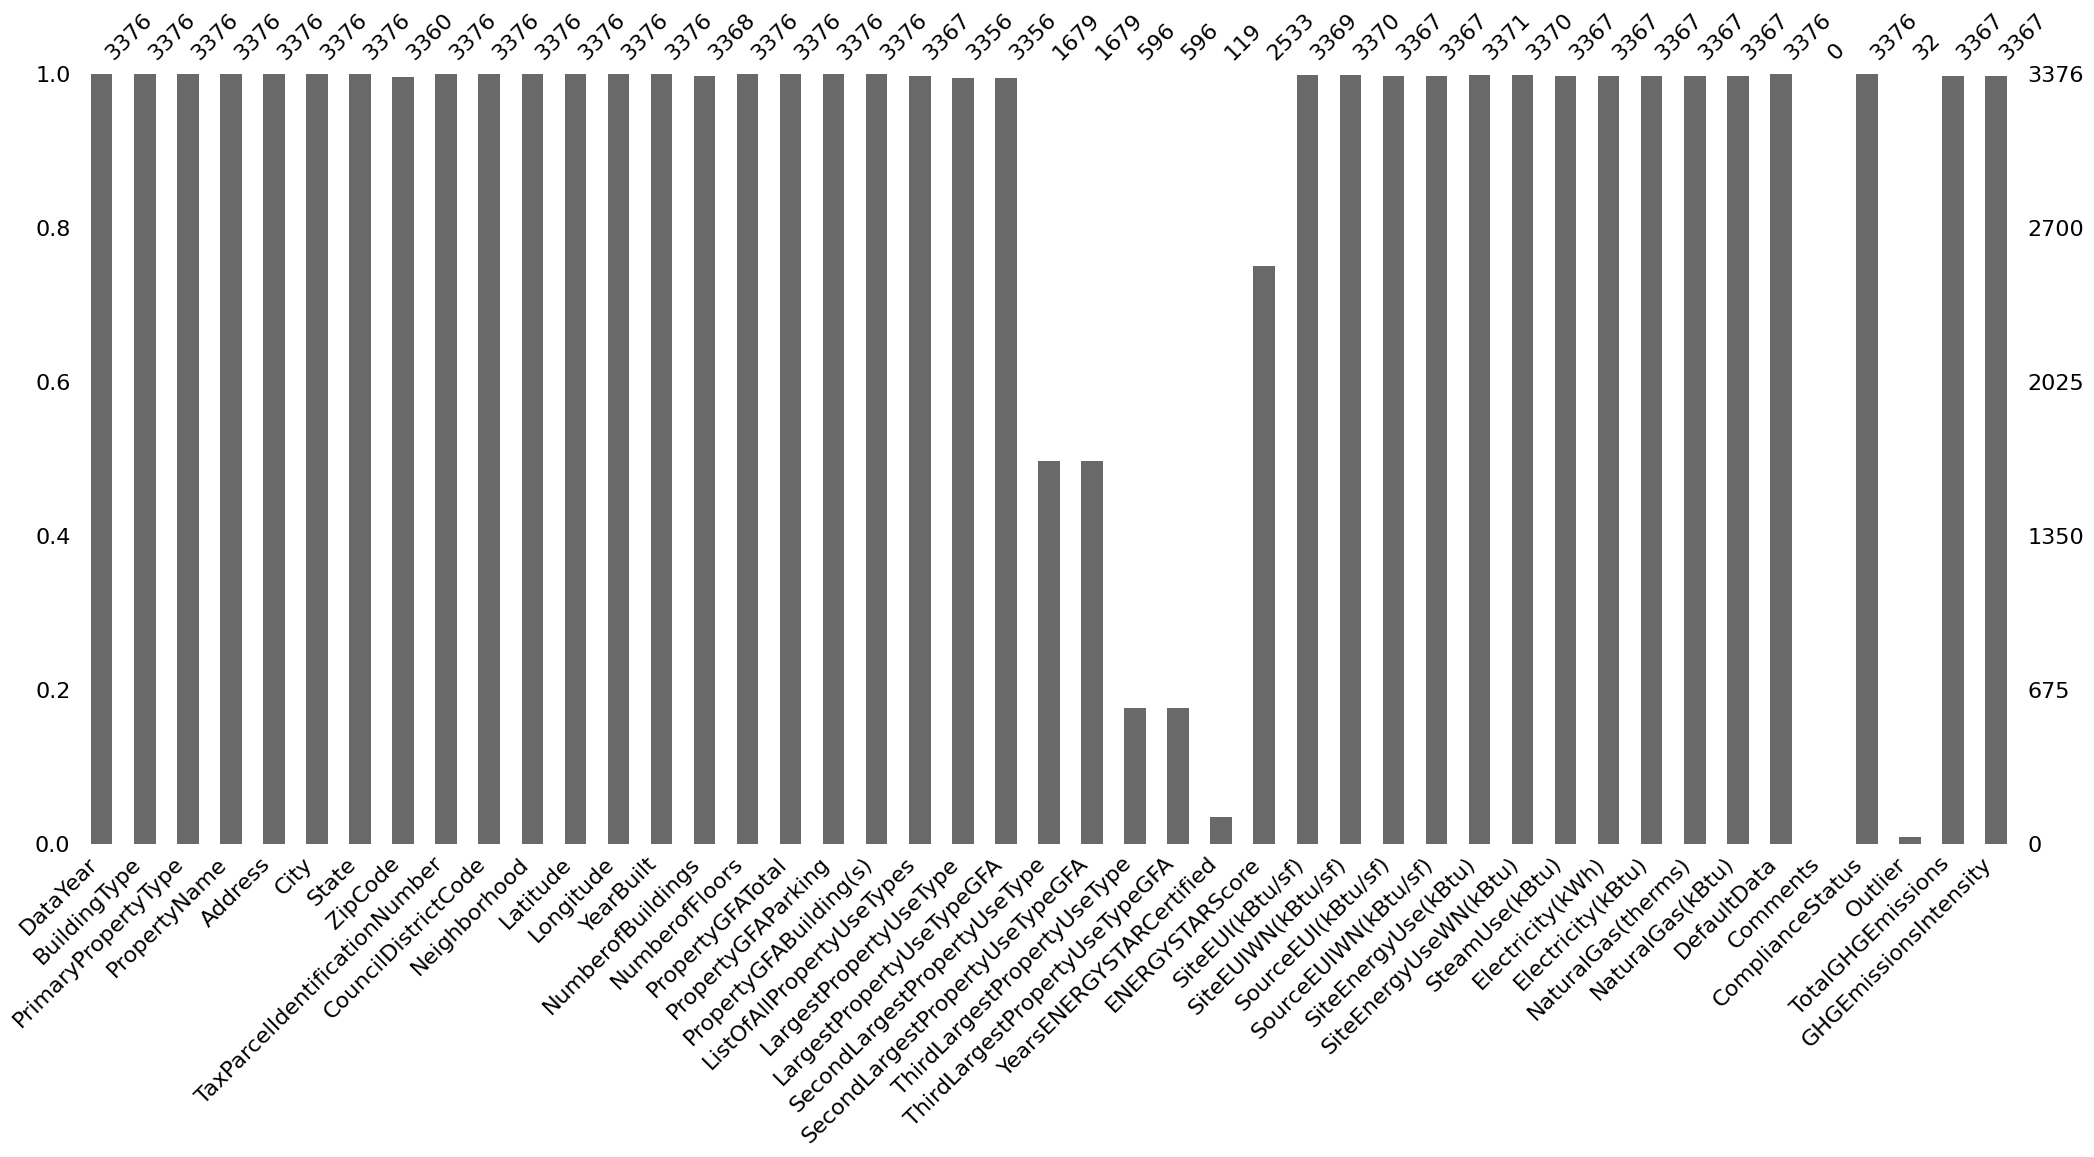

In [4]:
msno.bar(data)
plt.show()

- According [data descriptions](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy), GFA means Gross Floor Area.  
- It is normal to find some missing value for second and third use type of a property. When the property has only one use type.
- About 50 % of the properties have several use types.
- A Building with no ENERGYSTAR certification probably has a missing values in 'YearsENERGYSTARCertified'. So not much are certified.
- ENERGYSTARScore is an on going score calculation doing by colleagues.
- there is no information in 'Comments'.



In [5]:
data = data.drop('Comments', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 1 to 50226
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         3376 non-null   int64  
 1   BuildingType                     3376 non-null   object 
 2   PrimaryPropertyType              3376 non-null   object 
 3   PropertyName                     3376 non-null   object 
 4   Address                          3376 non-null   object 
 5   City                             3376 non-null   object 
 6   State                            3376 non-null   object 
 7   ZipCode                          3360 non-null   float64
 8   TaxParcelIdentificationNumber    3376 non-null   object 
 9   CouncilDistrictCode              3376 non-null   int64  
 10  Neighborhood                     3376 non-null   object 
 11  Latitude                         3376 non-null   float64
 12  Longitude          

## 1.2.  [&#9650;](#toc0_) <a id='toc1_2_'></a> astype category

In [6]:
# Searching for more info
for col in data.columns:
    print(f"{col} : {data[col].nunique()} / {data[col].dtype} - {round(data[col].notnull().mean()*100, 2)} %")

DataYear : 1 / int64 - 100.0 %
BuildingType : 8 / object - 100.0 %
PrimaryPropertyType : 24 / object - 100.0 %
PropertyName : 3362 / object - 100.0 %
Address : 3354 / object - 100.0 %
City : 1 / object - 100.0 %
State : 1 / object - 100.0 %
ZipCode : 55 / float64 - 99.53 %
TaxParcelIdentificationNumber : 3268 / object - 100.0 %
CouncilDistrictCode : 7 / int64 - 100.0 %
Neighborhood : 19 / object - 100.0 %
Latitude : 2876 / float64 - 100.0 %
Longitude : 2656 / float64 - 100.0 %
YearBuilt : 113 / int64 - 100.0 %
NumberofBuildings : 17 / float64 - 99.76 %
NumberofFloors : 50 / int64 - 100.0 %
PropertyGFATotal : 3195 / int64 - 100.0 %
PropertyGFAParking : 496 / int64 - 100.0 %
PropertyGFABuilding(s) : 3193 / int64 - 100.0 %
ListOfAllPropertyUseTypes : 466 / object - 99.73 %
LargestPropertyUseType : 56 / object - 99.41 %
LargestPropertyUseTypeGFA : 3122 / float64 - 99.41 %
SecondLargestPropertyUseType : 50 / object - 49.73 %
SecondLargestPropertyUseTypeGFA : 1352 / float64 - 49.73 %
ThirdLa

'City', 'DataYear' and 'State' have the same value for each property. It will not be relevant for prediction. 

I won't inspect it.

In [7]:
# Casting to categories
categories = ['BuildingType',
              'PrimaryPropertyType',
              'City',
              'State',
              'Neighborhood',
              'ComplianceStatus']

data.loc[:, categories] = data.loc[:, categories].apply(lambda x: x.astype('category'), axis=0)    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 1 to 50226
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   DataYear                         3376 non-null   int64   
 1   BuildingType                     3376 non-null   category
 2   PrimaryPropertyType              3376 non-null   category
 3   PropertyName                     3376 non-null   object  
 4   Address                          3376 non-null   object  
 5   City                             3376 non-null   category
 6   State                            3376 non-null   category
 7   ZipCode                          3360 non-null   float64 
 8   TaxParcelIdentificationNumber    3376 non-null   object  
 9   CouncilDistrictCode              3376 non-null   int64   
 10  Neighborhood                     3376 non-null   category
 11  Latitude                         3376 non-null   float64 
 12  Longi

/tmp/ipykernel_10873/1454074869.py:9: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, categories] = data.loc[:, categories].apply(lambda x: x.astype('category'), axis=0)


## 1.3.  [&#9650;](#toc0_) <a id='toc1_3_'></a>Identifying what seems reliable in the data set

In [8]:
fts = ['DefaultData',
       'ComplianceStatus',
       'Outlier']

for ft in fts:
    print(ft)
    display(data[ft].value_counts())

DefaultData


False    3263
True      113
Name: DefaultData, dtype: int64

ComplianceStatus


Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: ComplianceStatus, dtype: int64

Outlier


Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

Only compliant buildings could be used. If so, we do not lose to much data and data are complete and safe to use for prediction.

In [9]:
# Outliers are in compliant buildings ?
data.loc[data.Outlier.notnull(), ['ComplianceStatus', 'Outlier']]

,ComplianceStatus,Outlier
OSEBuildingID,,
350,Non-Compliant,High outlier
539,Non-Compliant,Low outlier
608,Non-Compliant,Low outlier
704,Non-Compliant,High outlier
19708,Non-Compliant,Low outlier
19934,Non-Compliant,Low outlier
19967,Error - Correct Default Data,Low outlier
20367,Non-Compliant,Low outlier
20617,Error - Correct Default Data,Low outlier


All outliers **are not** in compliant buildings. selecting on ComplianceStatus is enough.

In [10]:
data = data.loc[data.ComplianceStatus == 'Compliant', :]
data.shape

(3211, 44)

# 2.  [&#9650;](#toc0_) <a id='toc2_'></a>Univariate analysis and some cleansing.

In [11]:
data.columns 

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGE

## 2.1.  [&#9650;](#toc0_) <a id='toc2_1_'></a>Building Type

NonResidential          1432
Multifamily LR (1-4)     985
Multifamily MR (5-9)     570
Multifamily HR (10+)     108
Nonresidential COS        81
Campus                    24
SPS-District K-12         10
Nonresidential WA          1
Name: BuildingType, dtype: int64

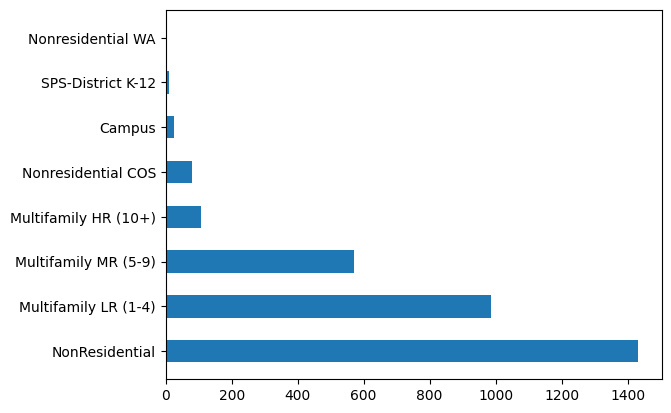

In [12]:
top = data.BuildingType.value_counts().head(10)
display(top)
plt.barh(top.index, top.values, 0.5)
plt.show()

In [13]:
# Selecting only Non-residential buildings.
sel = ['NonResidential',
       'Nonresidential COS',
       'Campus',               
       'SPS-District K-12',    
       'Nonresidential WA']

data = data.loc[data.BuildingType.isin(sel), :]
data.shape

(1548, 44)

There are 1548 non-residential buildings.

## 2.2.  [&#9650;](#toc0_) <a id='toc2_2_'></a>Primary Property Type

Small- and Mid-Sized Office    286
Other                          245
Warehouse                      185
Large Office                   169
Mixed Use Property             113
Retail Store                    85
Hotel                           75
Worship Facility                69
Distribution Center             53
K-12 School                     50
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Laboratory                      10
Hospital                        10
Low-Rise Multifamily             2
Mid-Rise Multifamily             0
Office                           0
High-Rise Multifamily            0
Name: PrimaryPropertyType, dtype: int64

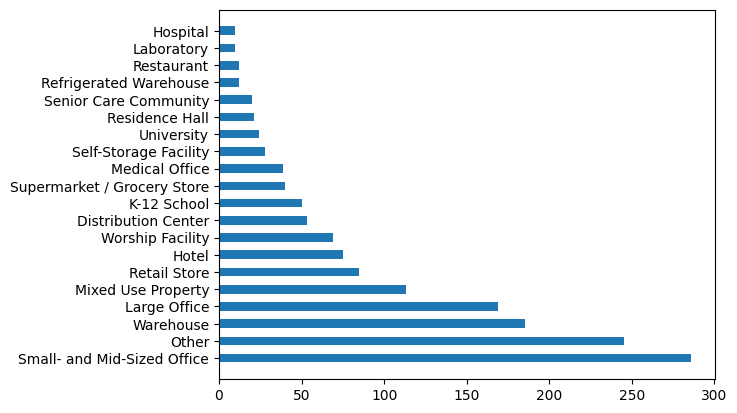

In [14]:
display(data.PrimaryPropertyType.value_counts())
top = data.PrimaryPropertyType.value_counts().head(20)
plt.barh(top.index, top.values, 0.5)
plt.show()

I'll need to explore what is in 'Other' and 'Mixed Use Property'  if possible. 

But first let's see why residential buildings remain.

In [15]:
data.loc[data.PrimaryPropertyType == 'Low-Rise Multifamily']

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19445,2016,NonResidential,Low-Rise Multifamily,Pacific Pointe,2108 N Pacific St.,Seattle,WA,98103.0,0354000254,4,LAKE UNION,47.64859,-122.33311,2000,1.0,3,93079,36093,56986,Multifamily Housing,Multifamily Housing,91064.0,NaN,NaN,NaN,NaN,NaN,32.0,21.900000,23.000000,63.099998,65.099998,1997181.5,2090011.625,0.0,5.111956e+05,1744199.0,2529.819824,252982.0,False,Compliant,NaN,25.60,0.28
21481,2016,Campus,Low-Rise Multifamily,Sanitary Market,1525 FIrst Avenue,Seattle,WA,98101.0,1976200210,7,DOWNTOWN,47.60918,-122.34079,1942,1.0,4,45500,0,45500,"Bar/Nightclub, Food Sales, Multifamily Housing, Restaurant, Retail Store, Self-Storage Facility",Multifamily Housing,22669.0,Retail Store,10455.0,Restaurant,3668.0,NaN,NaN,85.199997,85.199997,267.500000,267.500000,3778355.0,3778355.000,0.0,1.107372e+06,3778355.0,0.000000,0.0,False,Compliant,NaN,26.34,0.58


There is some wrong information here because the 2 properties have Low-Rise Multifamily in both PrimaryPropertyTime and LargestPropertyTypeUse. So building type seems wrong.

May be my way of selecting properties was a bit to naive. I will cross information for that in my function called 'selecting_non_residential_properties'.

See section of LargestPropertyTypeUse for more exploration.

## 2.3.  [&#9650;](#toc0_) <a id='toc2_3_'></a>Zip Code

98134.0    180
98104.0    153
98101.0    144
98109.0    138
98108.0    111
98122.0     86
98121.0     83
98105.0     80
98103.0     63
98119.0     60
Name: ZipCode, dtype: int64

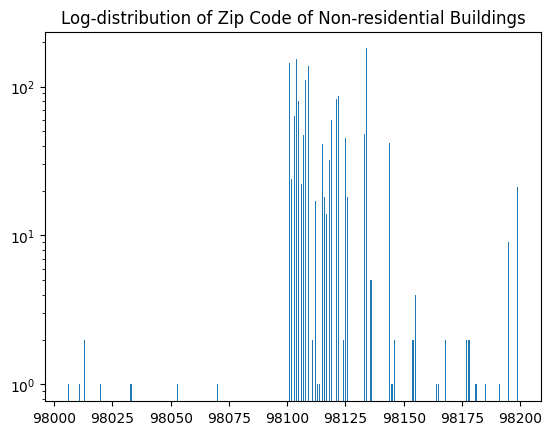

In [16]:
display(data.ZipCode.value_counts().head(10))
a = data.ZipCode.value_counts()
plt.bar(a.index, a.values, 0.5, log=True)
plt.title('Log-distribution of Zip Code of Non-residential Buildings')
plt.show()

In [17]:
data.ZipCode.isnull().sum()
# data.ZipCode = data.ZipCode.astype('int32')

13

May be missing values can be assessed crossing with 'Neighborhood'.

## 2.4.  [&#9650;](#toc0_) <a id='toc2_4_'></a>CouncilDistrictCode

In [160]:
data.CouncilDistrictCode.value_counts()

7    492
2    357
3    175
4    155
5    115
6     99
1     94
Name: CouncilDistrictCode, dtype: int64

## 2.5.  [&#9650;](#toc0_) <a id='toc2_5_'></a>Year Built (or complete renovation)

1900    43
1970    31
2000    30
1910    28
1979    28
1960    28
1926    27
1962    27
1969    25
1980    25
Name: YearBuilt, dtype: int64

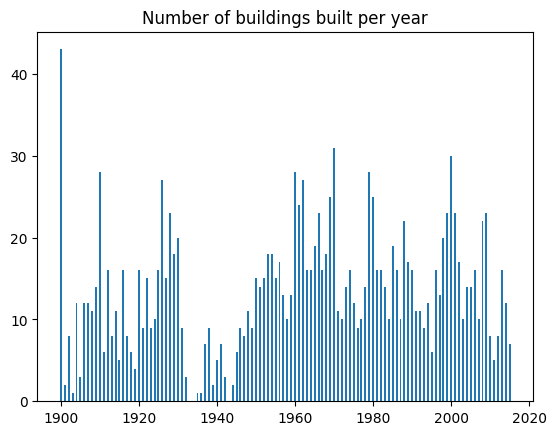

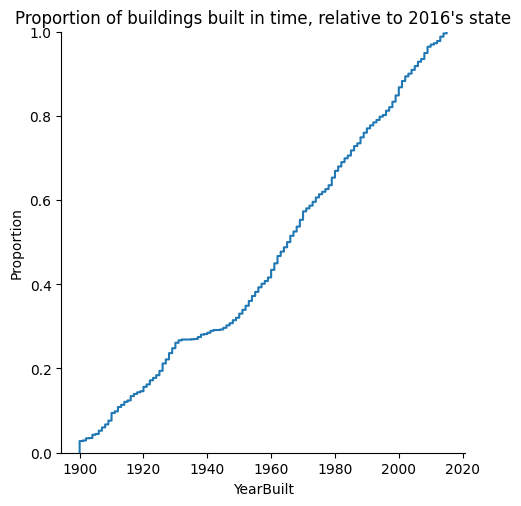

In [18]:
display(data.YearBuilt.value_counts().head(10))
a = data.YearBuilt.value_counts()
plt.bar(a.index, a.values, 0.5)
plt.title('Number of buildings built per year')
plt.show()
data.YearBuilt.describe()
sns.displot(data=data, x='YearBuilt', kind='ecdf')
plt.title("Proportion of buildings built in time, relative to 2016's state")
plt.show()

In [19]:
data.YearBuilt.isnull().sum()

0

## 2.6.  [&#9650;](#toc0_) <a id='toc2_6_'></a>Neighborhood

DOWNTOWN                  351
GREATER DUWAMISH          328
MAGNOLIA / QUEEN ANNE     144
LAKE UNION                143
NORTHEAST                 117
EAST                      116
NORTHWEST                  74
BALLARD                    58
NORTH                      51
CENTRAL                    42
DELRIDGE                   36
SOUTHEAST                  31
SOUTHWEST                  31
North                       8
Ballard                     5
Delridge                    4
Central                     4
Northwest                   4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

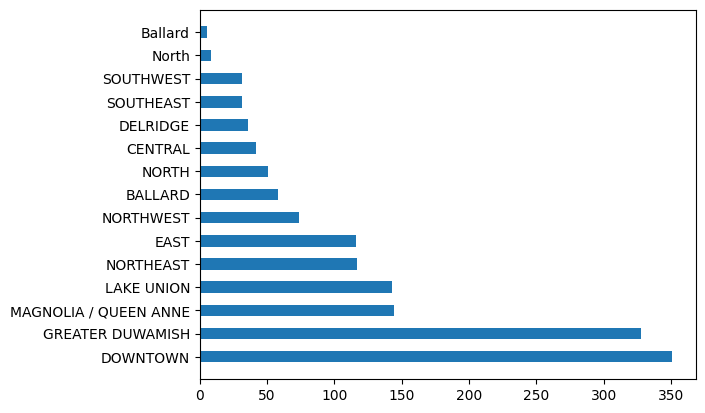

In [20]:
display(data.Neighborhood.value_counts())
top = data.Neighborhood.value_counts().head(15)
plt.barh(top.index, top.values, 0.5)
plt.show()

In [21]:
def neighborhood_correction(df):
    pass
    ## POSSIBLE EVOLUTION : WILL BE DONE IF USED IN PREDICTION MODELS.
    

In [22]:
data.Neighborhood.isnull().sum()

0

## 2.7.  [&#9650;](#toc0_) <a id='toc2_7_'></a>Number of Buildings in the property

1.0      1444
0.0        52
2.0        14
3.0        12
5.0         7
4.0         4
6.0         4
14.0        2
8.0         2
27.0        1
11.0        1
9.0         1
7.0         1
23.0        1
10.0        1
111.0       1
Name: NumberofBuildings, dtype: int64

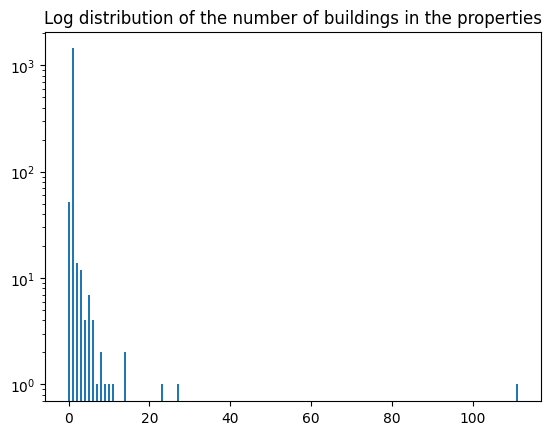

count    1548.000000
mean        1.178941
std         3.039221
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64

In [23]:
display(data.NumberofBuildings.value_counts())
a = data.NumberofBuildings.value_counts()
plt.bar(a.index, a.values, 0.5, log=True)
plt.title("Log distribution of the number of buildings in the properties")
plt.show()
data.NumberofBuildings.describe()

In [24]:
# Who is the top outlier? Is it plausible?
data.loc[data.NumberofBuildings == 111]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111.0,0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,False,Compliant,NaN,11140.56,1.2


In [25]:
# Properties with no buildings although there is at least 20 000 sq. ft.?
df = data.loc[data.NumberofBuildings == 0]
print(df.shape)
df.sample(10)

(52, 44)


,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
391,2016,NonResidential,Mixed Use Property,Thaw Building,8300 Military Rd South,Seattle,WA,98108.0,0007400015,2,GREATER DUWAMISH,47.52871,-122.29443,1970,0.0,1,88400,0,88400,"Distribution Center, Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,33450.0,Office,29620.0,Distribution Center,27715.0,NaN,42.0,48.299999,53.000000,109.000000,113.900002,4.383100e+06,4.811200e+06,0.0,7.416934e+05,2530658.0,18524.421880,1852442.0,False,Compliant,NaN,116.03,1.31
21336,2016,NonResidential,Other,University Club,1004 Boren Ave,Seattle,WA,98104.0,1978200605,3,EAST,47.60970,-122.32500,1912,0.0,3,20411,0,20411,Social/Meeting Hall,Social/Meeting Hall,20411.0,NaN,NaN,NaN,NaN,NaN,NaN,98.699997,105.099998,183.000000,189.699997,2.014476e+06,2.145050e+06,0.0,2.271227e+05,774943.0,12395.330080,1239533.0,False,Compliant,NaN,71.23,3.49
26719,2016,NonResidential,Small- and Mid-Sized Office,220_3rd_ave_s_03262013,220 3rd Ave South,Seattle,WA,98104.0,5247801085,7,DOWNTOWN,47.60026,-122.32990,1905,0.0,2,33640,0,33640,Office,Office,27322.0,NaN,NaN,NaN,NaN,NaN,70.0,39.500000,41.900002,124.000000,131.500000,1.078536e+06,1.144343e+06,0.0,3.161007e+05,1078536.0,0.000000,0.0,False,Compliant,NaN,7.52,0.22
25461,2016,NonResidential,Restaurant,(ID25461) CHINA HARBOR RESTURANT & MARINA,2040 WESTLAKE AVE N,Seattle,WA,98109.0,4088803835,7,LAKE UNION,47.63734,-122.33988,1962,0.0,2,34072,0,34072,Restaurant,Restaurant,34072.0,NaN,NaN,NaN,NaN,NaN,NaN,193.300003,205.699997,366.399994,388.399994,6.584966e+06,7.007726e+06,0.0,7.808287e+05,2664187.0,39207.785160,3920779.0,False,Compliant,NaN,226.81,6.66
640,2016,NonResidential,Large Office,Starbucks Center,2401 Utah Ave South,Seattle,WA,98134.0,7666207220,2,GREATER DUWAMISH,47.58181,-122.33534,1912,0.0,6,1380959,0,1380959,"Non-Refrigerated Warehouse, Office, Retail Store",Office,1000730.0,Retail Store,281296.0,Non-Refrigerated Warehouse,220303.0,NaN,79.0,49.299999,50.099998,146.100006,147.199997,7.413058e+07,7.525230e+07,0.0,1.985948e+07,67760546.0,63700.199220,6370020.0,False,Compliant,NaN,810.70,0.59
322,2016,NonResidential,Large Office,Cox Media Group Seattle KIRO TV (322),2801 3rd Ave,Seattle,WA,98121.0,0656000005,7,DOWNTOWN,47.61757,-122.35122,1968,0.0,3,100734,26731,74003,Office,Office,100734.0,NaN,NaN,NaN,NaN,NaN,20.0,97.199997,98.199997,305.100006,308.399994,9.788717e+06,9.892566e+06,0.0,2.868908e+06,9788716.0,0.000000,0.0,False,Compliant,NaN,68.24,0.68
24822,2016,NonResidential,Small- and Mid-Sized Office,1943 First Avenue,1943 1st Avenue South,Seattle,WA,98134.0,7666207160,2,GREATER DUWAMISH,47.58462,-122.33470,1910,0.0,3,49052,0,49052,"Office, Retail Store",Office,32393.0,Retail Store,10057.0,NaN,NaN,NaN,96.0,34.000000,34.000000,106.599998,106.599998,1.441446e+06,1.441446e+06,0.0,4.224635e+05,1441445.0,0.000000,0.0,False,Compliant,NaN,10.05,0.20
588,2016,NonResidential,Mixed Use Property,1616 Eastlake,1616 Eastlake Ave. E,Seattle,WA,98102.0,3383900230,4,LAKE UNION,47.63451,-122.32505,2002,0.0,5,251827,113318,138509,"Laboratory, Office, Parking",Parking,113318.0,Laboratory,84000.0,Office,84000.0,NaN,NaN,280.399994,284.700012,657.099976,661.700012,4.710243e+07,4.783752e+07,0.0,8

- One property has much more buildings than the others. It is the campus.
- We have some problems with the properties having no building indicated. There should be at least 1...
- I'd rather not consider this as such to predict the targets as 91 properties have a problem.


In [26]:
df.PrimaryPropertyType.value_counts()

Other                          13
Small- and Mid-Sized Office    10
Mixed Use Property              6
Large Office                    4
Warehouse                       3
Retail Store                    3
Hotel                           2
Supermarket / Grocery Store     2
Laboratory                      2
Medical Office                  2
Refrigerated Warehouse          1
Restaurant                      1
Residence Hall                  1
Worship Facility                1
Hospital                        1
High-Rise Multifamily           0
Office                          0
Mid-Rise Multifamily            0
Self-Storage Facility           0
Senior Care Community           0
Low-Rise Multifamily            0
K-12 School                     0
University                      0
Distribution Center             0
Name: PrimaryPropertyType, dtype: int64

In [27]:
# Computing percentage of each Primary type that would be discarded from the initial 
# data if I chose to discard buildings with this 0 supposed-error.
df.PrimaryPropertyType.value_counts()*100 / initial_data.PrimaryPropertyType.value_counts()

Distribution Center             0.000000
High-Rise Multifamily           0.000000
Hospital                       10.000000
Hotel                           2.597403
K-12 School                     0.000000
Laboratory                     20.000000
Large Office                    2.312139
Low-Rise Multifamily            0.000000
Medical Office                  5.128205
Mid-Rise Multifamily            0.000000
Mixed Use Property              4.511278
Office                          0.000000
Other                           5.078125
Refrigerated Warehouse          8.333333
Residence Hall                  4.347826
Restaurant                      8.333333
Retail Store                    3.296703
Self-Storage Facility           0.000000
Senior Care Community           0.000000
Small- and Mid-Sized Office     3.412969
Supermarket / Grocery Store     5.000000
University                      0.000000
Warehouse                       1.604278
Worship Facility                1.408451
Name: PrimaryPro

It seems reasonable to discard those buildings as none of the categories would disappear significantly.

In [28]:
# keeping non-zero buildings properties
data = data.loc[data.NumberofBuildings != 0]
print(data.shape)
# Searching for nulls
data.loc[data.NumberofBuildings.isnull(), 'PrimaryPropertyType']

(1496, 44)


Series([], Name: PrimaryPropertyType, dtype: category
Categories (24, object): ['Distribution Center', 'High-Rise Multifamily', 'Hospital', 'Hotel', ..., 'Supermarket / Grocery Store', 'University', 'Warehouse', 'Worship Facility'])

In [29]:
data.PrimaryPropertyType.value_counts().head()

Small- and Mid-Sized Office    276
Other                          232
Warehouse                      182
Large Office                   165
Mixed Use Property             107
Name: PrimaryPropertyType, dtype: int64

In [30]:
# Removing the 3 nulls as they are part of the most well-represented 
# category and saving memory.
data = data.loc[data.NumberofBuildings.notnull()]
print(data.shape)
data.NumberofBuildings = data.NumberofBuildings.astype('uint8')

(1496, 44)


POSSIBLE EVOLUTION : may be instead of discarding (knn imputer per type)

## 2.8.  [&#9650;](#toc0_) <a id='toc2_8_'></a>Number of floors

1     412
2     337
3     230
4     136
5      99
6      80
7      33
8      21
11     18
10     16
0      15
14      9
12      9
9       8
13      7
42      5
15      5
17      4
19      4
16      3
21      3
22      3
23      3
29      3
18      3
20      3
25      3
33      3
36      2
34      2
41      2
24      2
46      1
99      1
27      1
76      1
56      1
30      1
28      1
55      1
63      1
37      1
49      1
47      1
39      1
Name: NumberofFloors, dtype: int64

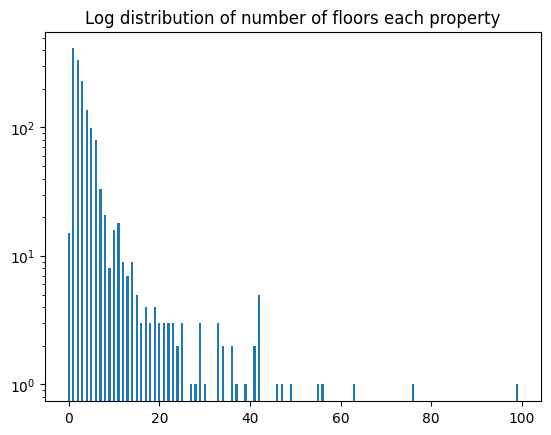

count    1496.000000
mean        4.292112
std         6.847471
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        99.000000
Name: NumberofFloors, dtype: float64

In [31]:
ft = 'NumberofFloors'
display(data[ft].value_counts())
a = data[ft].value_counts()
plt.bar(a.index, a.values, 0.5, log=True)
plt.title('Log distribution of number of floors each property')
plt.show()
data[ft].describe()

In [159]:
data.NumberofFloors = data.NumberofFloors.astype('uint8')

0 floors should be corrected at some point

## 2.9.  [&#9650;](#toc0_) <a id='toc2_9_'></a>Property GFA Building(s)

<Figure size 800x400 with 0 Axes>

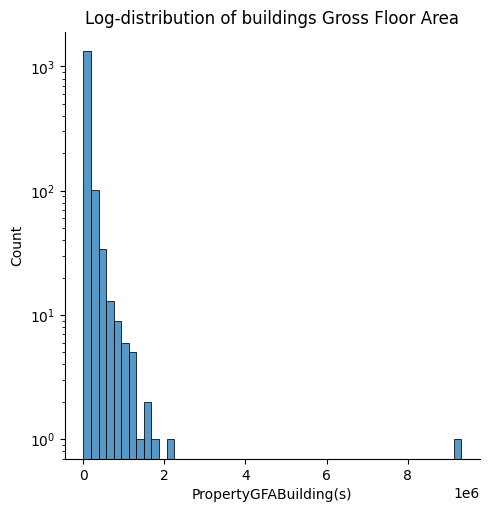

count    1.496000e+03
mean     1.074312e+05
std      2.953401e+05
min      3.636000e+03
25%      2.792675e+04
50%      4.591200e+04
75%      9.491200e+04
max      9.320156e+06
Name: PropertyGFABuilding(s), dtype: float64

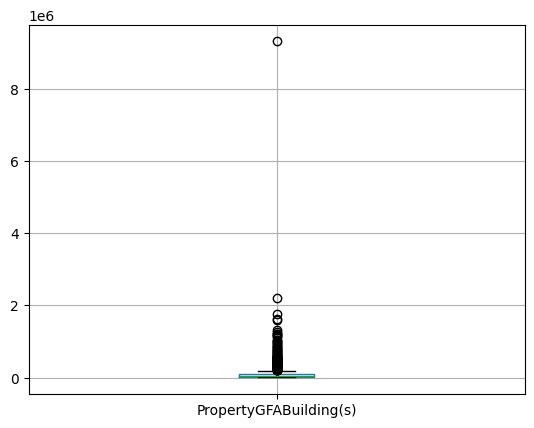

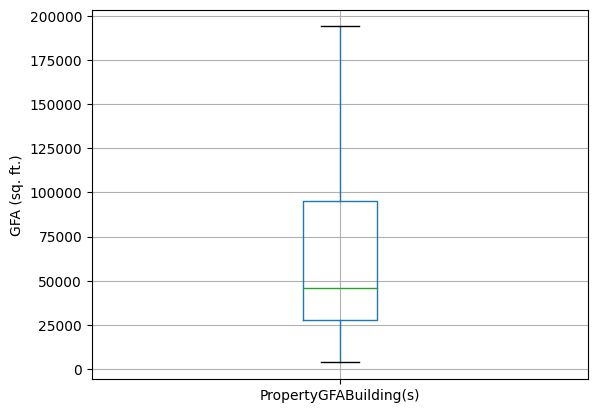

In [33]:
ft = 'PropertyGFABuilding(s)'
plt.figure(figsize=(8,4))
sns.displot(data=data, x='PropertyGFABuilding(s)', bins=50, log=True)
plt.title('Log-distribution of buildings Gross Floor Area')
plt.show()
display(data[ft].describe())
data.boxplot(ft)
plt.show()
data.boxplot(ft, showfliers=False)
plt.ylabel('GFA (sq. ft.)')
plt.show()

In [34]:
data.loc[data[ft] > 3e6]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111,0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,192577488.0,657074389.0,0.0,0.0,False,Compliant,NaN,11140.56,1.2


No surprise to find the campus as the winner in the floor area category!

In [35]:
data.loc[data[ft] > 1e6]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
245,2016,NonResidential,Other,CenturyLink,800 Occidental Ave. South,Seattle,WA,98134.0,7666204876,2,GREATER DUWAMISH,47.595440,-122.331590,1999,1,6,1585960,327680,1258280,"Other - Entertainment/Public Assembly, Parking",Other - Entertainment/Public Assembly,1585960.0,Parking,0.0,NaN,NaN,NaN,NaN,37.700001,39.200001,104.699997,106.300003,59757440.0,62160304.0,0.000000e+00,14490010.0,49439914.0,103175.179700,10317518.0,False,Compliant,NaN,892.63,0.56
249,2016,NonResidential,Other,Safeco Field,1250 First Avenue South,Seattle,WA,98134.0,7666206483,2,GREATER DUWAMISH,47.590850,-122.333540,1999,1,3,1172127,0,1172127,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,1172127.0,NaN,NaN,NaN,NaN,NaN,NaN,50.099998,49.000000,125.099998,121.400002,58761304.0,57406988.0,0.000000e+00,11905739.0,40622381.0,181389.203100,18138920.0,False,Compliant,NaN,1246.55,1.06
276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,3,EAST,47.603990,-122.323770,2000,9,8,1158691,0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NaN,NaN,NaN,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,1.225750e+08,49438336.0,168683602.0,18321.291020,1832129.0,False,Compliant,NaN,10734.57,9.26
345,2016,NonResidential,Large Office,999 Third Avenue,"999 3rd Avenue, Suite 1550",Seattle,WA,98104.0,0939000435,7,DOWNTOWN,47.605050,-122.334270,1983,1,47,1323055,0,1323055,"Office, Parking, Restaurant",Office,1011135.0,Parking,272682.0,Restaurant,37595.0,NaN,94.0,42.599998,42.599998,133.500000,133.500000,44683660.0,44683660.0,0.000000e+00,13048606.0,44521844.0,1618.117065,161812.0,False,Compliant,NaN,318.97,0.24
357,2016,Nonresidential COS,Large Office,Seattle Municipal Tower (2030),700 Fifth Avenue,Seattle,WA,98104.0,0942000720,3,DOWNTOWN,47.605010,-122.329880,1990,1,63,1354987,159600,1195387,"Office, Parking",Office,1191115.0,Parking,159599.0,Other,18656.0,2014201320112010200920082007,89.0,50.400002,50.400002,158.100006,158.100006,61576184.0,61576184.0,0.000000e+00,18046946.0,61576180.0,0.000000,0.0,False,Compliant,NaN,429.27,0.32
399,2016,NonResidential,Large Office,1201 Third Avenue,1201 3rd ave,Seattle,WA,98101.0,1974700120,7,DOWNTOWN,47.607230,-122.336110,1988,1,55,1400000,285000,1115000,"Office, Other, Parking, Restaurant",Office,994116.0,Parking,264481.0,Other,133598.0,2017201120102007,92.0,46.700001,48.500000,140.199997,145.300003,53079164.0,55140300.0,2.179488e+06,14499658.0,49472833.0,14268.400390,1426840.0,False,Compliant,NaN,588.90,0.42
402,2016,NonResidential,Large Office,US Bank Centre,1420 5th Avenue,Seattle,WA,98101.0,1975700080,7,DOWNTOWN,47.610540,-122.334660,1989,1,46,1536606,512608,1023998,"Financial Office, Office, Other, Parking, Restaurant, Retail Store",Office,1002403.0,Parking,377046.0,Other,53116.0,201720162014201320122011201020092007,89.0,51.900002,53.599998,157.300003,162.699997,56606136.0,58506844.0,0.000000e+00,15729209.0,53668061.0,29380.699220,2938070.0,False,Compliant,NaN,530.18,0.35
422,2016,NonResidential,Large Office,Two Union Square,601 Union St.,Seattle

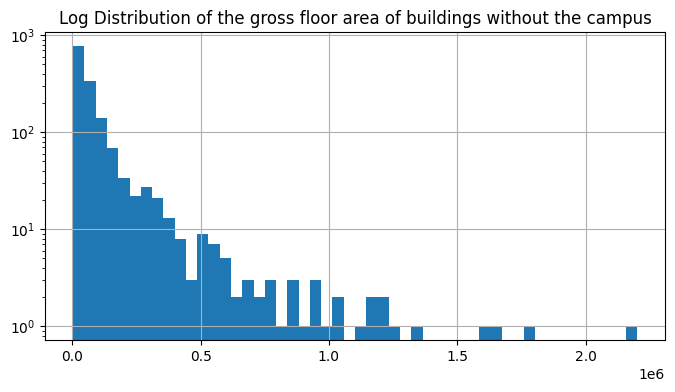

In [36]:
df = data.loc[data[ft] < 3e6]
plt.figure(figsize=(8,4))
df[ft].hist(bins=50, log=True)
plt.title("Log Distribution of the gross floor area of buildings without the campus")
plt.show()

In [37]:
data[ft] = data[ft].astype('uint32')

## 2.10.  [&#9650;](#toc0_) <a id='toc2_10_'></a>ENERGYSTAR Score

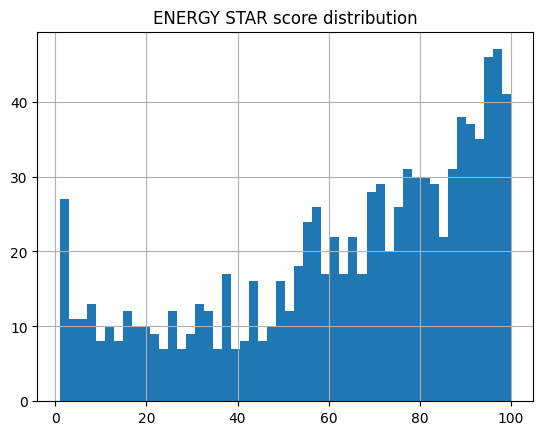

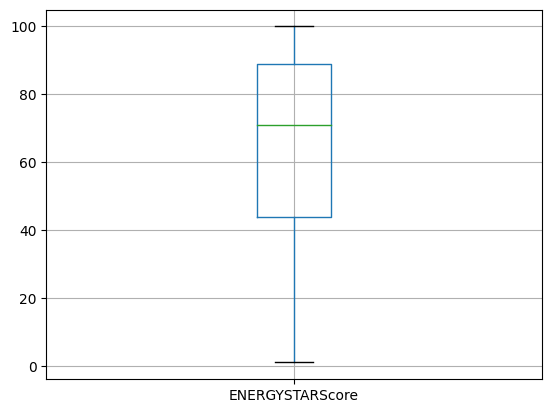

count    973.000000
mean      63.802672
std       28.832104
min        1.000000
25%       44.000000
50%       71.000000
75%       89.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64

In [38]:
ft = "ENERGYSTARScore"
data[ft].hist(bins=50)
plt.title('ENERGY STAR score distribution')
plt.show()
data.boxplot(ft)
plt.show()
data[ft].describe()

In [39]:
data[ft].sample(5)

OSEBuildingID
19461    90.0
24705     NaN
245       NaN
24202     NaN
21483     NaN
Name: ENERGYSTARScore, dtype: float64

In [40]:
data[ft].isnull().mean()

0.34959893048128343

almost 25% of the values are missing.

## 2.11.  [&#9650;](#toc0_) <a id='toc2_11_'></a>Largest Property Use Type

In [41]:
ft = 'LargestPropertyUseType'
data[ft].value_counts()

Office                                                  470
Non-Refrigerated Warehouse                              193
Other                                                    91
Retail Store                                             90
Hotel                                                    73
Worship Facility                                         68
Distribution Center                                      54
K-12 School                                              50
Supermarket/Grocery Store                                40
Medical Office                                           39
Self-Storage Facility                                    27
Parking                                                  27
Other - Recreation                                       26
College/University                                       24
Other - Entertainment/Public Assembly                    21
Senior Care Community                                    20
Residence Hall/Dormitory                

In [42]:
data[['PrimaryPropertyType', ft]].sample(10)

,PrimaryPropertyType,LargestPropertyUseType
OSEBuildingID,,
26849,Retail Store,Retail Store
24178,Mixed Use Property,Office
563,Small- and Mid-Sized Office,Office
23674,Small- and Mid-Sized Office,Office
26324,Senior Care Community,Senior Care Community
20686,Self-Storage Facility,Self-Storage Facility
316,Hotel,Hotel
743,Laboratory,Laboratory
570,Small- and Mid-Sized Office,Office


It is more detailed than PrimaryPropertyType. And thus gives more categories.

I'd rather use PrimaryPropertyType for my predictions models.
Or use this to refine the model in a 'second layer'.

However, this can be a way to reinforce the data selection of non-residential properties on which I had doubts when selecting with BuildingType only. 

### 2.11.1.  [&#9650;](#toc0_) <a id='toc2_11_1_'></a>Searching to reinforce the non-residential properties selection

In [43]:
fts = ['PrimaryPropertyType', 'LargestPropertyUseType', 'BuildingType']
types = data.loc[data.LargestPropertyUseType == 'Multifamily Housing',
                 fts]
display(types)
print(types.shape)

,PrimaryPropertyType,LargestPropertyUseType,BuildingType
OSEBuildingID,,,
264,Mixed Use Property,Multifamily Housing,NonResidential
19445,Low-Rise Multifamily,Multifamily Housing,NonResidential
21122,Mixed Use Property,Multifamily Housing,NonResidential
21481,Low-Rise Multifamily,Multifamily Housing,Campus
23562,Mixed Use Property,Multifamily Housing,NonResidential
25222,Mixed Use Property,Multifamily Housing,NonResidential
25522,Mixed Use Property,Multifamily Housing,NonResidential
26834,Mixed Use Property,Multifamily Housing,NonResidential
27838,Mixed Use Property,Multifamily Housing,NonResidential


(11, 3)


We see 11 inconsistencies.

In [44]:
initial_types = initial_data.loc[initial_data.LargestPropertyUseType == 'Multifamily Housing',
                                 fts]
print(initial_types.PrimaryPropertyType.value_counts())
print()
print(initial_types.BuildingType.value_counts())

Low-Rise Multifamily     976
Mid-Rise Multifamily     563
High-Rise Multifamily    103
Mixed Use Property        25
Name: PrimaryPropertyType, dtype: int64

Multifamily LR (1-4)    983
Multifamily MR (5-9)    569
Multifamily HR (10+)    103
NonResidential           11
Campus                    1
Name: BuildingType, dtype: int64


We found 12 inconsistencies from the initial dataset. One was already discarded ?

In [45]:
# Searching indexes of the 12 buildings
mask = initial_types.BuildingType.isin(['NonResidential', 'Campus'])
display(initial_types.loc[mask, :])
idx = initial_types.loc[mask, :].index
# Finding the one that went through
print([i for i in idx if i not in types.index])


,PrimaryPropertyType,LargestPropertyUseType,BuildingType
OSEBuildingID,,,
264,Mixed Use Property,Multifamily Housing,NonResidential
19445,Low-Rise Multifamily,Multifamily Housing,NonResidential
21122,Mixed Use Property,Multifamily Housing,NonResidential
21481,Low-Rise Multifamily,Multifamily Housing,Campus
23562,Mixed Use Property,Multifamily Housing,NonResidential
25222,Mixed Use Property,Multifamily Housing,NonResidential
25522,Mixed Use Property,Multifamily Housing,NonResidential
25674,Low-Rise Multifamily,Multifamily Housing,NonResidential
26834,Mixed Use Property,Multifamily Housing,NonResidential


[25674]


In [46]:
initial_data.loc[25674, :]

DataYear                                                         2016
BuildingType                                           NonResidential
PrimaryPropertyType                              Low-Rise Multifamily
PropertyName                                   (ID25674) COMET TAVERN
Address                                                 916 E PIKE ST
City                                                          Seattle
State                                                              WA
ZipCode                                                       98122.0
TaxParcelIdentificationNumber                              6003500480
CouncilDistrictCode                                                 3
Neighborhood                                                     EAST
Latitude                                                     47.61427
Longitude                                                  -122.31977
YearBuilt                                                        1910
NumberofBuildings   

It was already discarded because of its Compliance Status

In [47]:
# Checking if there was some false positive. 
sel_BuildingType = ['NonResidential',
                    'Nonresidential COS',
                    'Campus',               
                    'SPS-District K-12',    
                    'Nonresidential WA']

mask = (~initial_data.BuildingType.isin(sel)
        & (initial_data.LargestPropertyUseType != 'Multifamily Housing'))

initial_data.loc[mask, fts]

,PrimaryPropertyType,LargestPropertyUseType,BuildingType
OSEBuildingID,,,
19451,Senior Care Community,Senior Care Community,Multifamily LR (1-4)
19798,Low-Rise Multifamily,NaN,Multifamily LR (1-4)
19801,Other,Other,Multifamily LR (1-4)
20093,Other,Other,Multifamily HR (10+)
20758,Small- and Mid-Sized Office,Office,Multifamily LR (1-4)
20762,High-Rise Multifamily,NaN,Multifamily HR (10+)
21114,Senior Care Community,Senior Care Community,Multifamily HR (10+)
21568,Senior Care Community,Senior Care Community,Multifamily LR (1-4)
21825,Other,Other,Multifamily LR (1-4)


Indeed, we found discarded elements which should have not been.
I will have to handle that in a function later.

For now, it is ok to launch some models on that and see how it goes.

In [48]:
data.shape

(1496, 44)

In [49]:
#     sel = ['NonResidential',
#            'Nonresidential COS',
#            'Campus',               
#            'SPS-District K-12',    
#            'Nonresidential WA']
    
#     sel2 = ['Senior Care Community',
#             'College/University',
#             'Hotel',
#             'Residence Hall/Dormitory',
#             'Parking',
#             'Office']
    
#     mask = (data.BuildingType.isin(sel)) 
#             # & (data.LargestPropertyUseType.isin(sel2)))
    
#     data = data.loc[mask, :]



### 2.11.2.  [&#9650;](#toc0_) <a id='toc2_11_2_'></a>Exploring what remains in 'Other' and 'Mixed Use Property'

In [50]:
data.loc[(data.LargestPropertyUseType == 'Other'), fts]

,PrimaryPropertyType,LargestPropertyUseType,BuildingType
OSEBuildingID,,,
27,Other,Other,NonResidential
103,Other,Other,Nonresidential COS
104,Other,Other,Nonresidential COS
106,Other,Other,Nonresidential COS
110,Other,Other,Nonresidential COS
111,Other,Other,Nonresidential COS
112,Other,Other,Nonresidential COS
131,Other,Other,NonResidential
132,Other,Other,NonResidential


It is all non-residential

In [51]:
mix = data.loc[(data.PrimaryPropertyType == 'Mixed Use Property'), fts]
print(mix.shape)
mix.sample(30)

(107, 3)


,PrimaryPropertyType,LargestPropertyUseType,BuildingType
OSEBuildingID,,,
432,Mixed Use Property,Parking,Campus
830,Mixed Use Property,Other,NonResidential
24123,Mixed Use Property,Non-Refrigerated Warehouse,NonResidential
484,Mixed Use Property,Non-Refrigerated Warehouse,NonResidential
25666,Mixed Use Property,Retail Store,NonResidential
26994,Mixed Use Property,Parking,NonResidential
23857,Mixed Use Property,Office,NonResidential
50219,Mixed Use Property,Other - Recreation,Nonresidential COS
26535,Mixed Use Property,Bank Branch,NonResidential


some family Housing remain as principal use type.

In [52]:
data.shape

(1496, 44)

In [53]:
data = data.loc[~((data.PrimaryPropertyType == 'Mixed Use Property')
                  & (data.LargestPropertyUseType == 'Multifamily Housing')),
                :]

In [54]:
data.shape

(1487, 44)

## 2.12.  [&#9650;](#toc0_) <a id='toc2_12_'></a>SiteEUI(kBtu/sf)

Site Energy Use Intensity (EUI) is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.

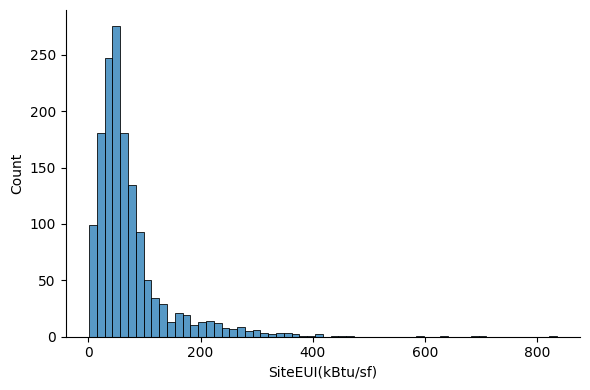

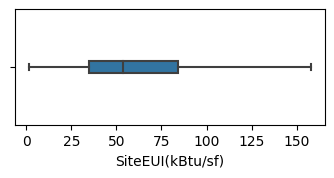

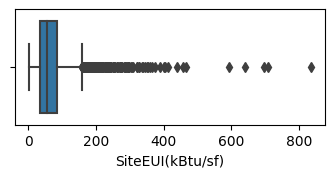

In [128]:
ft = 'SiteEUI(kBtu/sf)'
sns.displot(data=data, x=ft, height= 4, aspect=1.5, bins=60)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=False, width=0.1)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=True)
plt.show()

## 2.13.  [&#9650;](#toc0_) <a id='toc2_13_'></a>SiteEUIWN(kBtu/sf)

Same thing, Normalized by Weather conditions on 30 years. 

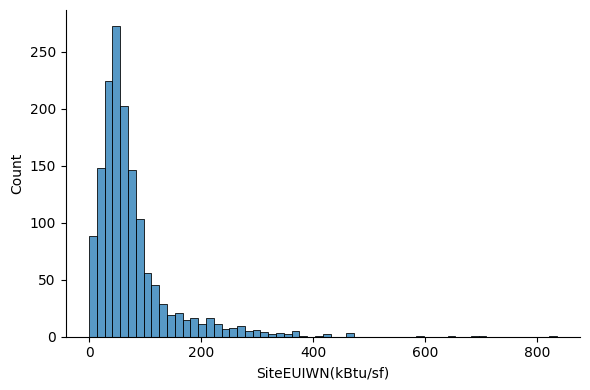

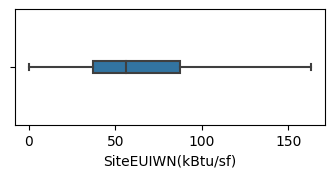

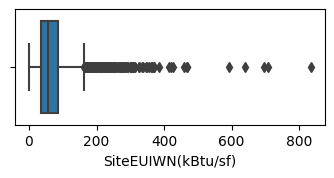

In [127]:
ft = 'SiteEUIWN(kBtu/sf)'
sns.displot(data=data, x=ft, height= 4, aspect=1.5, bins=60)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=False, width=0.1)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=True)
plt.show()

Very similar, seem scaled down.

## 2.14.  [&#9650;](#toc0_) <a id='toc2_14_'></a>SourceEUI(kBtu/sf)

Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.

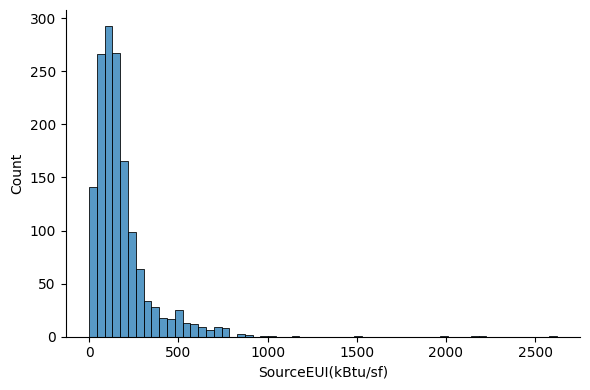

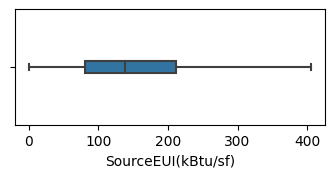

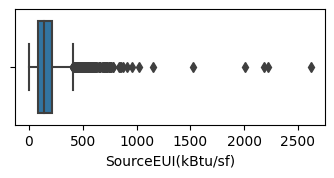

In [126]:
ft = 'SourceEUI(kBtu/sf)'
sns.displot(data=data, x=ft, height= 4, aspect=1.5, bins=60)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=False, width=0.1)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=True)
plt.show()

## 2.15.  [&#9650;](#toc0_) <a id='toc2_15_'></a>SourceEUIWN(kBtu/sf)

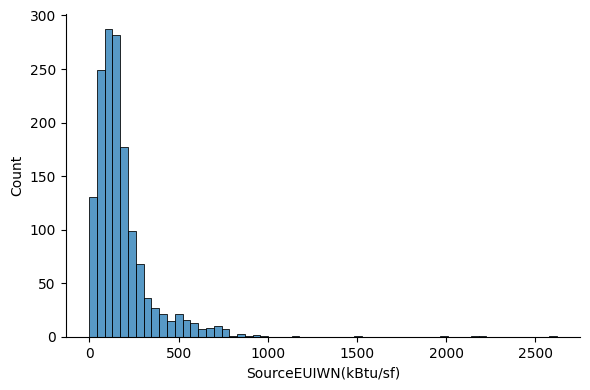

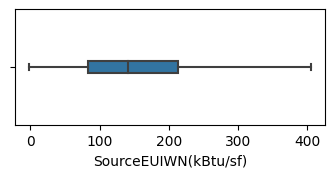

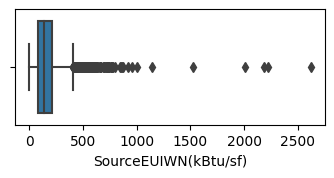

In [125]:
ft = 'SourceEUIWN(kBtu/sf)'
sns.displot(data=data, x=ft, height= 4, aspect=1.5, bins=60)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=False, width=0.1)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=True)
plt.show()

I see more variations between the WN and the normal feat than for siteEUI. It remains subtle

## 2.16.  [&#9650;](#toc0_) <a id='toc2_16_'></a>SiteEnergyUse(kBtu)

The annual amount of energy consumed by the property from all sources of energy.

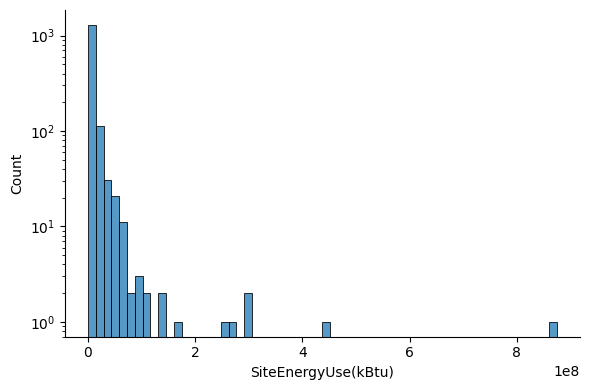

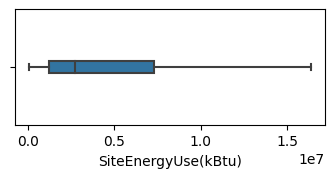

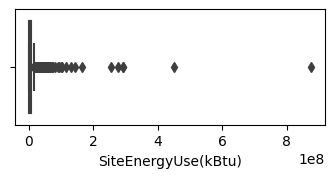

In [124]:
ft = 'SiteEnergyUse(kBtu)'
sns.displot(data=data, x=ft, height= 4, aspect=1.5, log=True, bins=60)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=False, width=0.1)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=True)
plt.show()

In [102]:
data.loc[data['SiteEnergyUse(kBtu)'] > 1e8, ['PropertyName',
                                             'NumberofBuildings',
                                             'PropertyGFABuilding(s)',
                                             'ListOfAllPropertyUseTypes',
                                             'SiteEUI(kBtu/sf)',
                                             'SiteEnergyUse(kBtu)']]

,PropertyName,NumberofBuildings,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu)
OSEBuildingID,,,,,,
43,Plant 2 Site,1,494835,"Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office",221.699997,448385312.0
198,Seattle Children's Hospital Main Campus,6,879000,Hospital (General Medical & Surgical),288.799988,253832464.0
268,Swedish Cherry Hill,6,597519,"Hospital (General Medical & Surgical), Parking",238.399994,143423024.0
276,Harborview Medical Center,9,1158691,"Hospital (General Medical & Surgical), Parking",217.100006,293090784.0
477,Weintraub/Hutchinson/Thomas,1,535947,"Other, Parking",245.100006,131373880.0
753,WestinBuilding,1,429405,"Data Center, Office",639.700012,274682208.0
828,Swedish First Hill,7,1765970,"Hospital (General Medical & Surgical), Parking",177.899994,291614432.0
22062,Entire Campus,1,2200000,"College/University, Parking",66.699997,114648520.0
23113,Central Campus,1,591981,"Medical Office, Other/Specialty Hospital, Outpatient Rehabilitation/Physical Therapy, Parking",173.399994,102673696.0


## 2.17.  [&#9650;](#toc0_) <a id='toc2_17_'></a>SiteEnergyUseWN(kBtu)

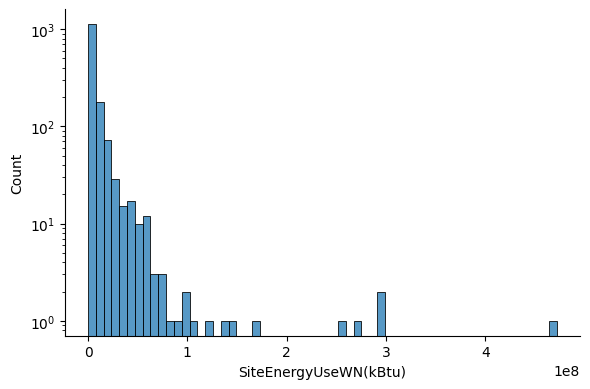

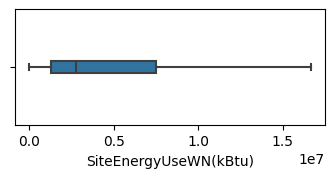

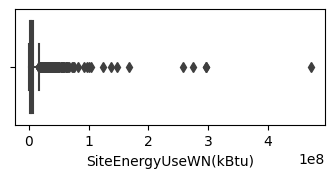

In [123]:
ft = 'SiteEnergyUseWN(kBtu)'
sns.displot(data=data, x=ft, height= 4, aspect=1.5, log=True, bins=60)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=False, width=0.1)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=True)
plt.show()

## 2.18.  [&#9650;](#toc0_) <a id='toc2_18_'></a>SteamUse

The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu).

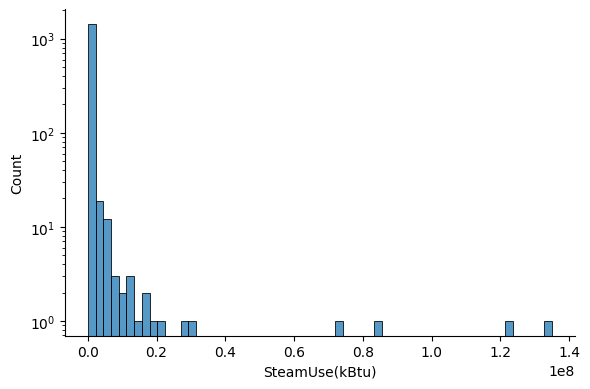

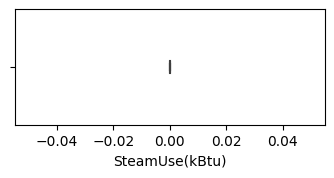

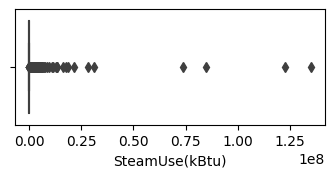

In [122]:
ft = 'SteamUse(kBtu)'
sns.displot(data=data, x=ft, height= 4, aspect=1.5, log=True, bins=60)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=False, width=0.1)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=True)
plt.show()

In [111]:
steam = data.loc[data['SteamUse(kBtu)'] > 0, 'SteamUse(kBtu)']
print(steam.shape)
steam.sample(10)

(111,)


OSEBuildingID
25657    3.406156e+05
429      3.480881e+06
19895    4.505223e+05
276      1.225750e+08
349      1.807318e+05
21418    2.097790e+06
25069    5.482947e+05
23404    7.489847e+05
343      1.092107e+07
436      1.447315e+06
Name: SteamUse(kBtu), dtype: float64

111 properties use a district remote heating system.

## 2.19.  [&#9650;](#toc0_) <a id='toc2_19_'></a>Electricity(kWh) and (kBtu)

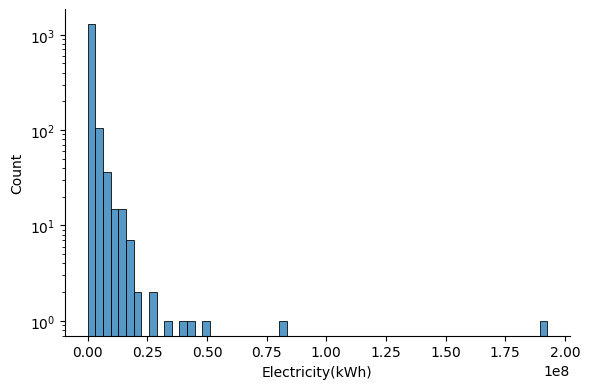

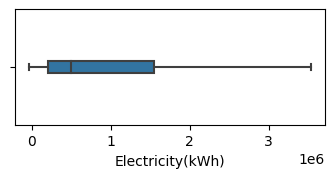

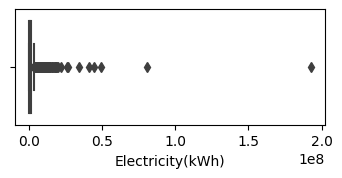

In [129]:
ft = 'Electricity(kWh)'
sns.displot(data=data, x=ft, height= 4,
            aspect=1.5, log=True,
            bins=60)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=False, width=0.1)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=True)
plt.show()

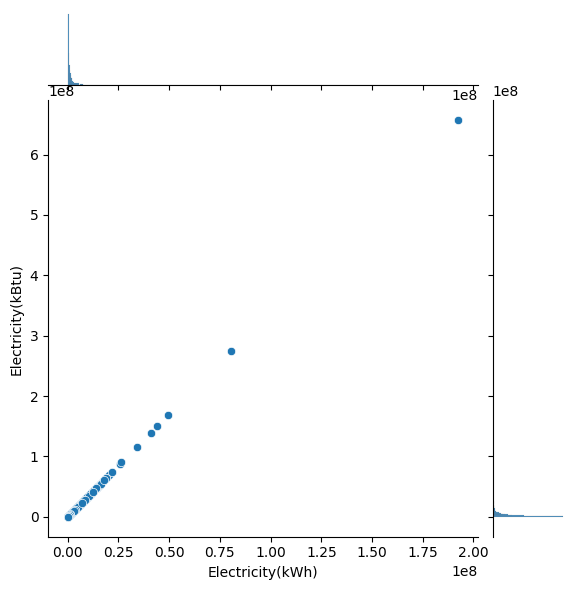

Pearsons correlation: 1.00000


In [140]:
# Observing if the information is redondant.
ft = 'Electricity(kWh)'
ft2 = 'Electricity(kBtu)'
sns.jointplot(data=data, x=ft, y=ft2)
plt.show()

# Computing Pearsons coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(data[ft], data[ft2])
print('Pearsons correlation: %.5f' % corr)

Information is exactly the same. Thus I can delete Electricity in kWh and keep the kBtu one for consistency with the other features.

In [143]:
data = data.drop(ft, axis='columns')
data.shape

(1487, 43)

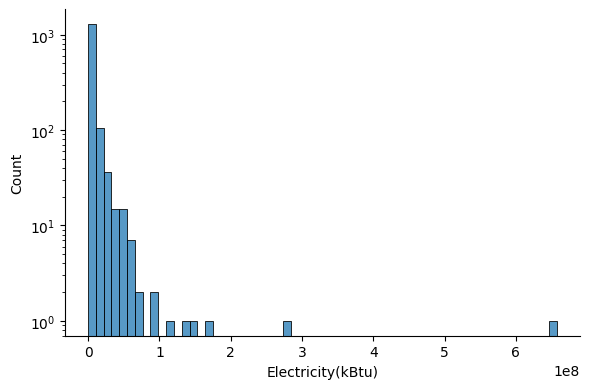

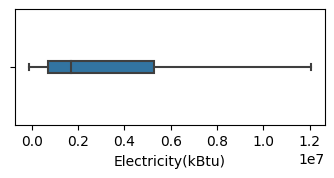

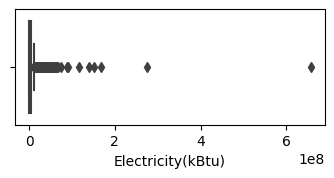

In [144]:
ft = 'Electricity(kBtu)'
sns.displot(data=data, x=ft, height= 4,
            aspect=1.5, log=True,
            bins=60)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=False, width=0.1)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=True)
plt.show()

## 2.20.  [&#9650;](#toc0_) <a id='toc2_20_'></a>NaturalGas(kBtu)

The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu).

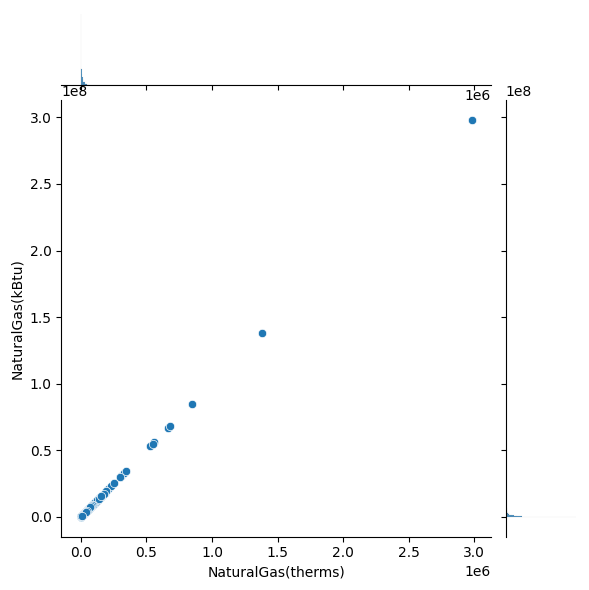

Pearsons correlation: 1.00000


In [145]:
# Observing if the information is redondant.
ft = 'NaturalGas(therms)'
ft2 = 'NaturalGas(kBtu)'
sns.jointplot(data=data, x=ft, y=ft2)
plt.show()

# Computing Pearsons coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(data[ft], data[ft2])
print('Pearsons correlation: %.5f' % corr)

same as before, so I remove gas in therms and keep gas in kBtu.

In [146]:
data = data.drop(ft, axis='columns')
data.shape

(1487, 42)

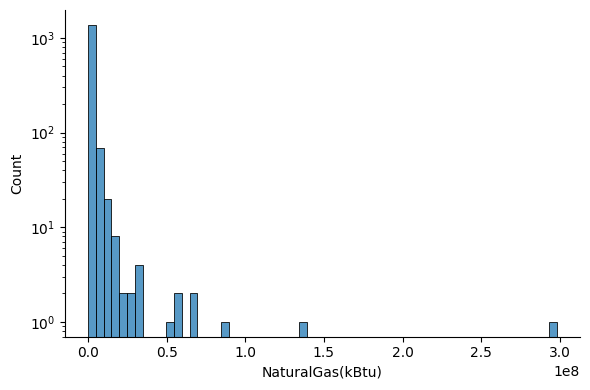

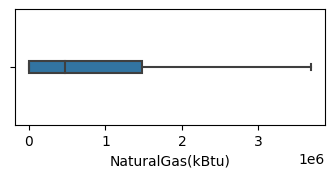

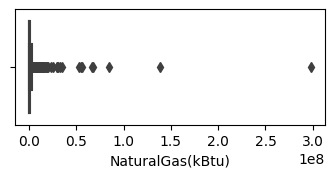

In [147]:
ft = 'NaturalGas(kBtu)'
sns.displot(data=data, x=ft, height= 4,
            aspect=1.5, log=True,
            bins=60)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=False, width=0.1)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=True)
plt.show()

In [148]:
data['NaturalGas(kBtu)'].isnull().sum()

0

## 2.21.  [&#9650;](#toc0_) <a id='toc2_21_'></a>TotalGHGEmissions

The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh until the 2016 factor is available. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

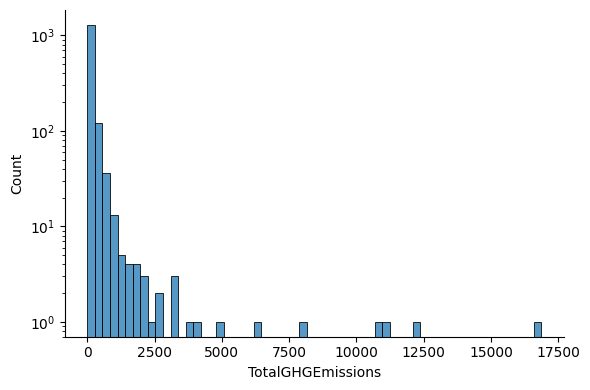

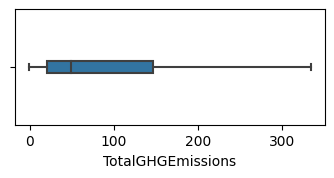

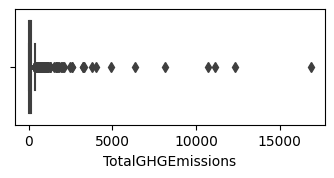

In [149]:
ft = 'TotalGHGEmissions'
sns.displot(data=data, x=ft, height= 4,
            aspect=1.5, log=True,
            bins=60)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=False, width=0.1)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=True)
plt.show()

## 2.22.  [&#9650;](#toc0_) <a id='toc2_22_'></a>GHGEmissionsIntensity

Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources

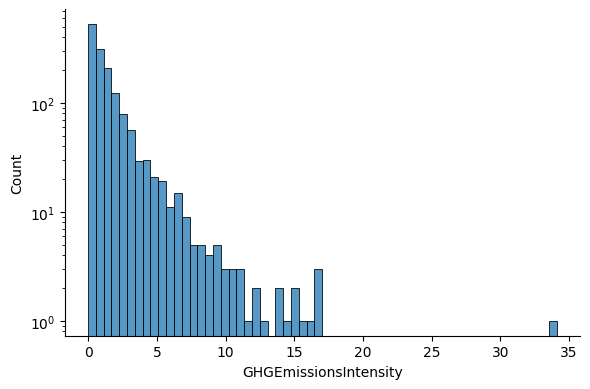

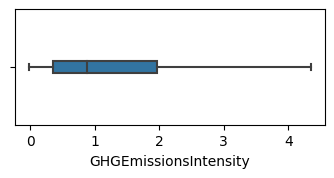

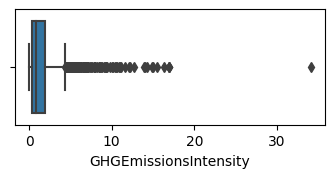

In [150]:
ft = 'GHGEmissionsIntensity'
sns.displot(data=data, x=ft, height= 4,
            aspect=1.5, log=True,
            bins=60)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=False, width=0.1)
plt.show()
plt.figure(figsize=(4, 1.5))
sns.boxplot(data=data, x=ft, showfliers=True)
plt.show()

In [156]:
data.loc[data.GHGEmissionsIntensity > 18]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,2,GREATER DUWAMISH,47.53493,-122.31788,1992,1,3,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NaN,8.0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,0.0,150476283.0,297909000.0,False,Compliant,NaN,16870.98,34.09


Above is a BOEING factory

In [157]:
data.loc[data.GHGEmissionsIntensity > 15]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,2,GREATER DUWAMISH,47.53493,-122.31788,1992,1,3,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NaN,8.0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,0.0,1.504763e+08,2.979090e+08,False,Compliant,NaN,16870.98,34.09
21435,2016,NonResidential,Other,space needle,400 broard street,Seattle,WA,98109.0,1985200495,7,MAGNOLIA / QUEEN ANNE,47.62049,-122.34930,1961,1,2,33971,0,33971,Other - Recreation,Other - Recreation,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,353.700012,363.299988,747.700012,757.900024,17686444.0,18163924.0,0.0,9.002735e+06,8.683709e+06,False,Compliant,NaN,523.95,15.42
23503,2016,NonResidential,Restaurant,Salty's Waterfront Seafood Grill,1936 Harbor Ave SW,Seattle,WA,98126.0,7666706590,1,SOUTHWEST,47.58654,-122.37644,1902,1,2,20398,0,20398,"Office, Restaurant",Restaurant,19232.0,Office,1166.0,NaN,NaN,NaN,NaN,456.600006,468.700012,835.799988,848.000000,9313513.0,9560583.0,0.0,3.478554e+06,5.834959e+06,False,Compliant,NaN,334.15,16.38
49940,2016,NonResidential,Hospital,Virginia Mason Medical Center - 2149,925 Seneca St.,Seattle,WA,98101.0,1979200210,3,EAST,47.60986,-122.32774,1920,1,8,374466,0,374466,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1010135.0,NaN,NaN,NaN,NaN,NaN,74.0,162.300003,165.500000,367.899994,369.399994,163945984.0,167207104.0,73885472.0,9.006050e+07,0.000000e+00,False,Compliant,NaN,6330.91,16.91
50208,2016,Nonresidential COS,Other,Ballard Pool,1471 NW 67th St,Seattle,WA,NaN,3050700005,6,BALLARD,47.67734,-122.37624,1972,1,1,12769,0,12769,"Fitness Center/Health Club/Gym, Office, Other - Recreation, Swimming Pool",Other - Recreation,10912.0,Fitness Center/Health Club/Gym,1670.0,Office,187.0,NaN,NaN,400.799988,420.600006,618.099976,638.900024,5117308.5,5370263.5,0.0,1.205173e+06,3.912135e+06,False,Compliant,NaN,216.18,16.93
50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recreation, Swimming Pool",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,438.200012,460.100006,744.799988,767.799988,5765898.0,6053764.5,0.0,1.792159e+06,3.973739e+06,False,Compliant,NaN,223.54,16.99


In [158]:
data.loc[data.TotalGHGEmissions > 5000]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,Seattle,WA,98108.0,0022000005,2,GREATER DUWAMISH,47.534930,-122.317880,1992,1,3,494835,0,494835,"Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NaN,8.0,221.699997,233.100006,388.200012,400.299988,448385312.0,471613856.0,0.0,150476283.0,297909000.0,False,Compliant,NaN,16870.98,34.09
198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,4800 Sand Point Way NE,Seattle,WA,98105.0,2982800005,4,NORTHEAST,47.662310,-122.281460,1953,6,10,879000,0,879000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),879000.0,NaN,NaN,NaN,NaN,NaN,10.0,288.799988,293.200012,578.200012,576.599976,253832464.0,257764208.0,0.0,115641210.0,138191238.0,False,Compliant,NaN,8145.52,9.27
276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,3,EAST,47.603990,-122.323770,2000,9,8,1158691,0,1158691,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1350182.0,Parking,387651.0,NaN,NaN,NaN,29.0,217.100006,219.699997,502.899994,502.799988,293090784.0,296671744.0,122575032.0,168683602.0,1832129.0,False,Compliant,NaN,10734.57,9.26
828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122.0,1978201096,3,EAST,47.608951,-122.322402,1994,7,14,1765970,0,1765970,"Hospital (General Medical & Surgical), Parking",Hospital (General Medical & Surgical),1639334.0,Parking,441551.0,NaN,NaN,NaN,54.0,177.899994,180.500000,377.000000,378.399994,291614432.0,295929888.0,134943456.0,139354828.0,17316120.0,False,Compliant,NaN,12307.16,6.97
49940,2016,NonResidential,Hospital,Virginia Mason Medical Center - 2149,925 Seneca St.,Seattle,WA,98101.0,1979200210,3,EAST,47.609860,-122.327740,1920,1,8,374466,0,374466,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1010135.0,NaN,NaN,NaN,NaN,NaN,74.0,162.300003,165.500000,367.899994,369.399994,163945984.0,167207104.0,73885472.0,90060497.0,0.0,False,Compliant,NaN,6330.91,16.91
49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.656440,-122.310410,1900,111,0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.000000,246.600006,0.000000,873923712.0,0.0,84985240.0,657074389.0,0.0,False,Compliant,NaN,11140.56,1.20


# 3.  [&#9650;](#toc0_) <a id='toc3_'></a>Bivariate analysis

## 3.1.  [&#9650;](#toc0_) <a id='toc3_1_'></a>Location of the properties

### 3.1.1.  [&#9650;](#toc0_) <a id='toc3_1_1_'></a>By primary type

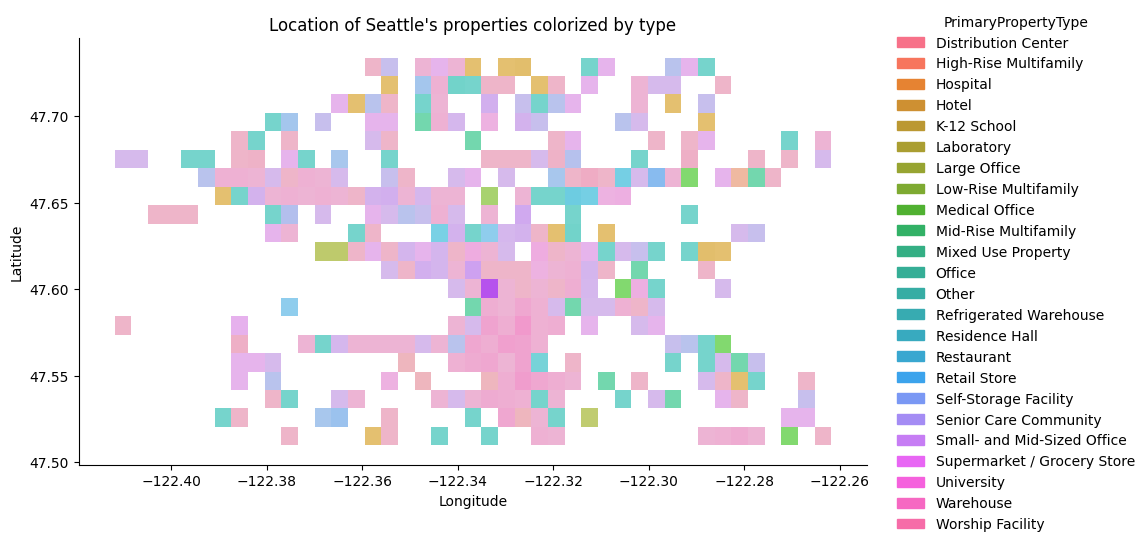

In [55]:
sns.displot(data=data, x='Longitude', y='Latitude',
            hue='PrimaryPropertyType', aspect=1.8)
plt.title("Location of Seattle's properties colorized by type")
plt.show()

Some properties might be overlapping. I want to plot the same info but with less category types each time.

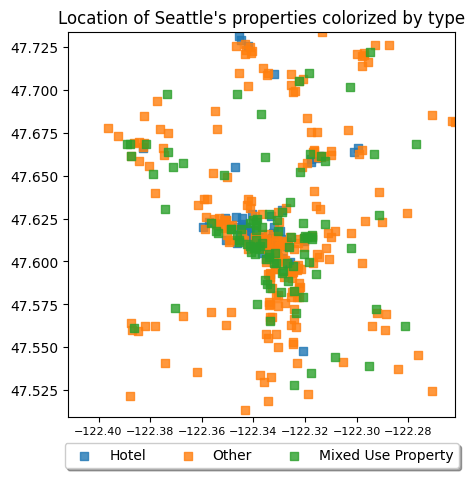

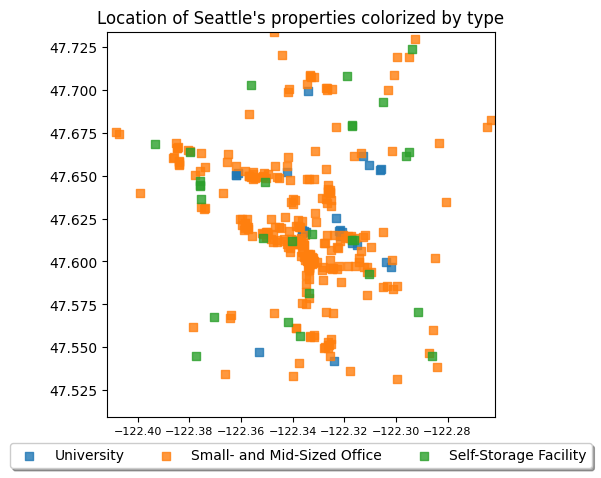

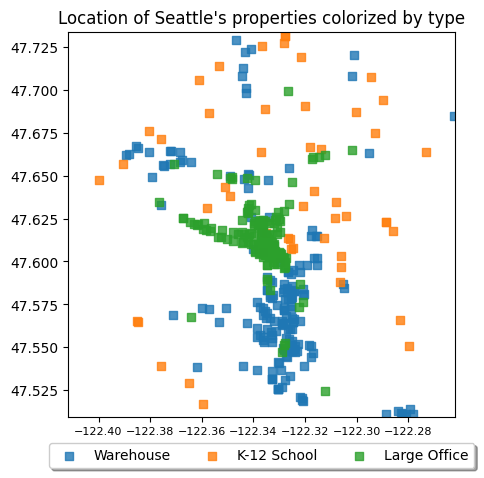

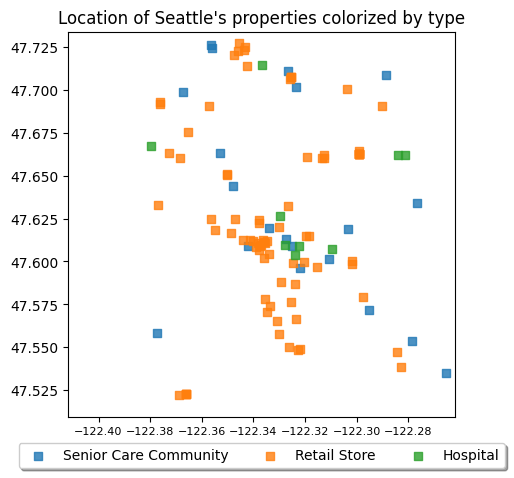

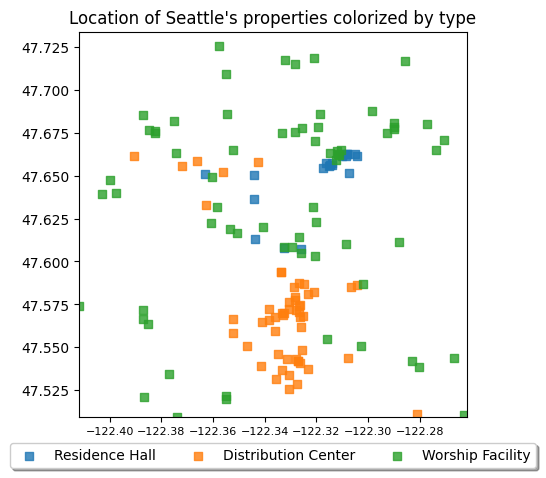

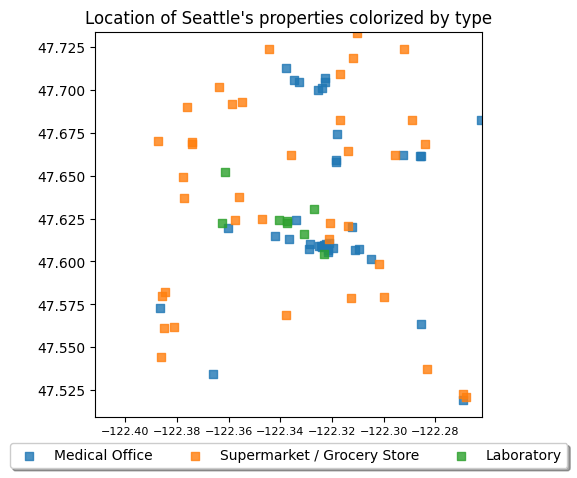

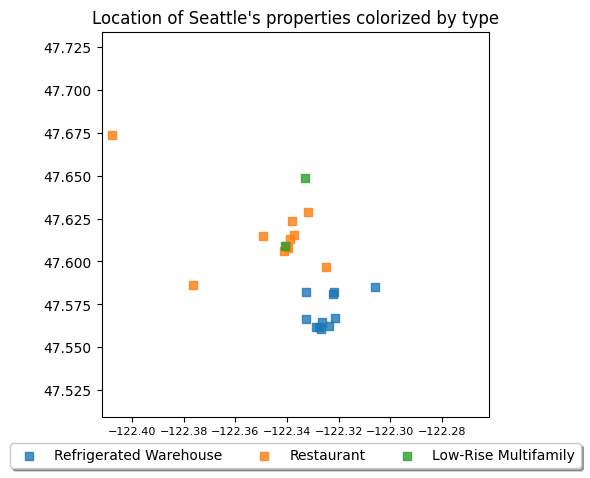

In [56]:
types = data.PrimaryPropertyType.unique()
chunk_size = 3
chunked_types = [types[n:n+chunk_size] 
                 for n in range(0, len(types), chunk_size)]
palette = sns.color_palette("tab10", chunk_size)

for chunk in chunked_types:
    fig = plt.figure(figsize=(5,5))
    for t, n in zip(chunk, range(3)):
        df = data.loc[data.PrimaryPropertyType == t, :]
        plt.scatter(x=df.Longitude,
                    y=df.Latitude,
                    marker="s",
                    alpha=0.8,
                    label=t,
                    color=palette[n])
    plt.xlim(min(data.Longitude), max(data.Longitude))
    plt.xticks(fontsize=8)
    plt.ylim(min(data.Latitude), max(data.Latitude))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
               fancybox=True, shadow=True, ncol=5)
    plt.title("Location of Seattle's properties colorized by type")
    plt.show()

### 3.1.2.  [&#9650;](#toc0_) <a id='toc3_1_2_'></a> By ZipCode -- and checking geographical consistency


Displaying the 5 zip codes and checking consistency with what is found on this [zip website](https://www.zipdatamaps.com/zipcodes-seattle-wa) 

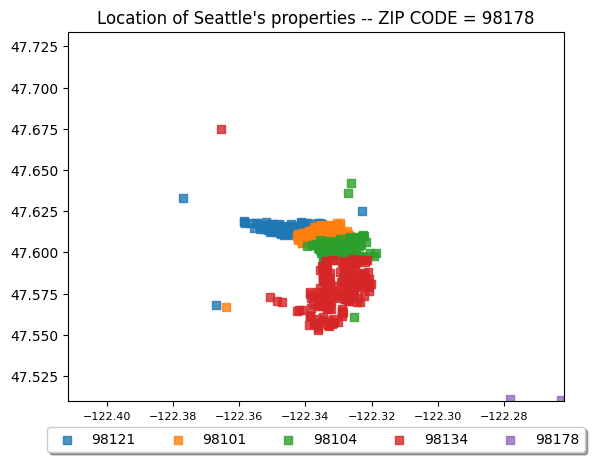

In [58]:
codes = [98121, 98101, 98104, 98134, 98178]
palette = sns.color_palette('tab10', 5)
for code, n in zip(codes, range(5)):
    df = data.loc[data.ZipCode == code, :]
    plt.scatter(x=df.Longitude,
                y=df.Latitude,
                marker="s",
                alpha=0.8,
                color=palette[n],
                label=code)
plt.xlim(min(data.Longitude), max(data.Longitude))
plt.xticks(fontsize=8)
plt.ylim(min(data.Latitude), max(data.Latitude))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
            fancybox=True, shadow=True, ncol=5)
plt.title(f"Location of Seattle's properties -- ZIP CODE = {code}")
plt.show()


It is quite consistent but we see some outliers. 

May be these properties have a pb in its localisation and not in the Zip Code. May be not...

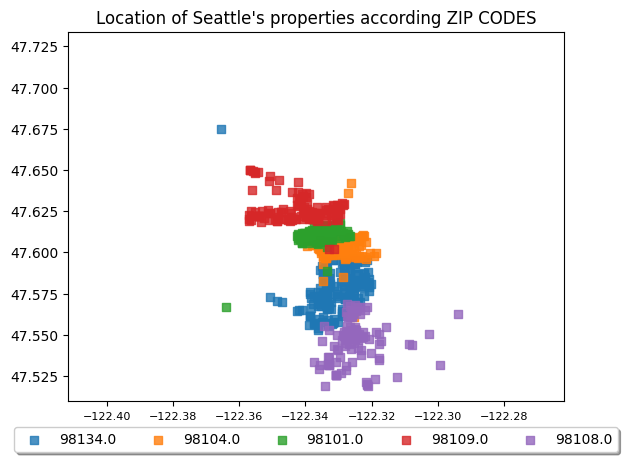

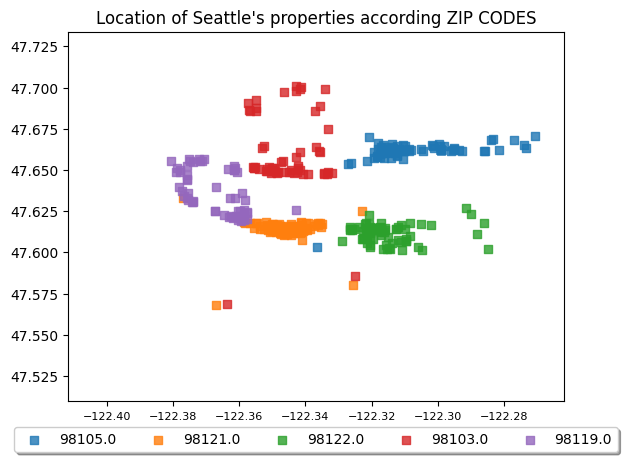

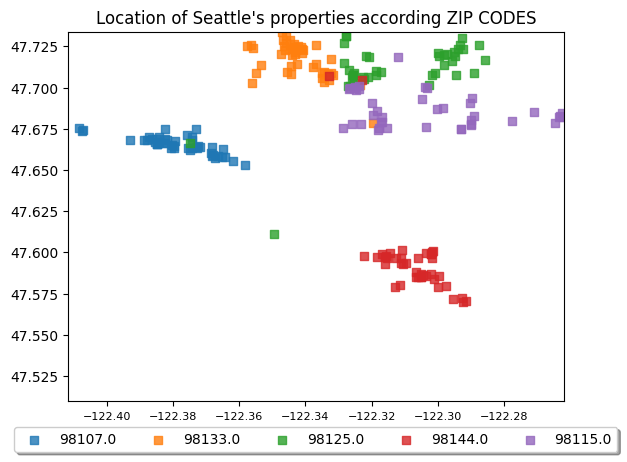

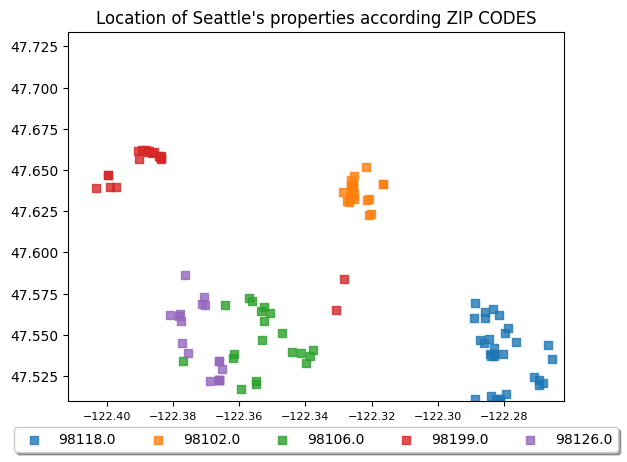

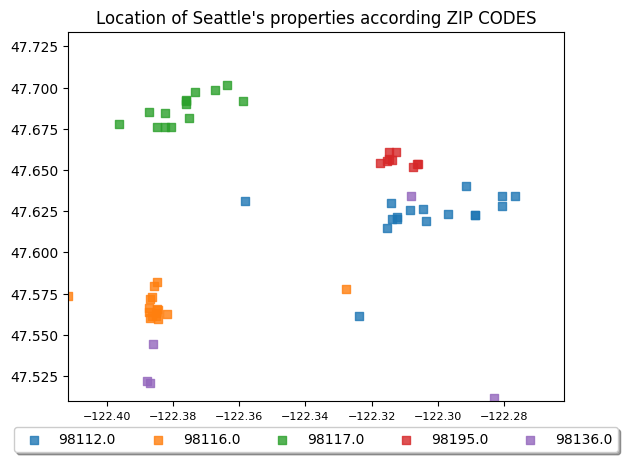

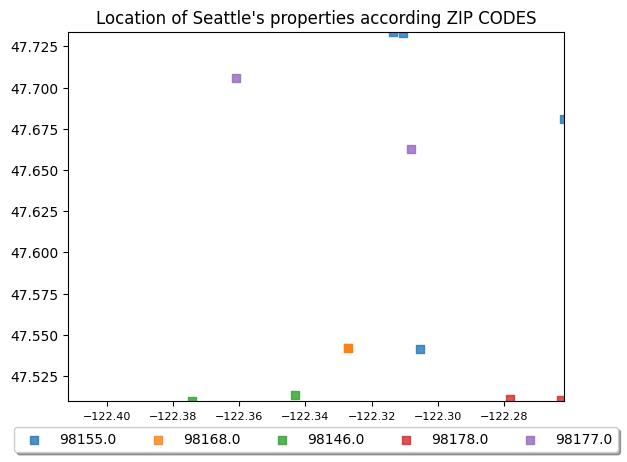

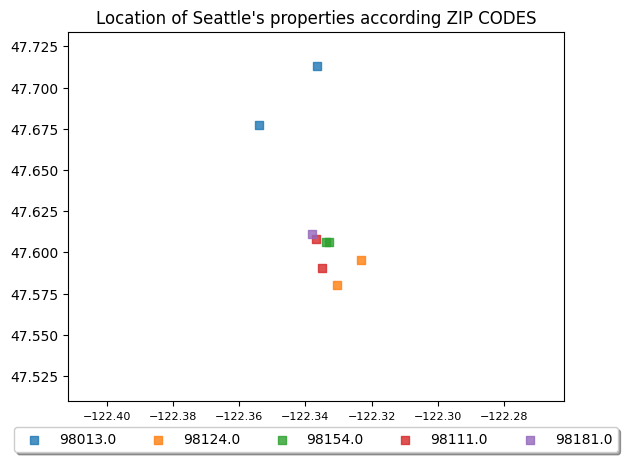

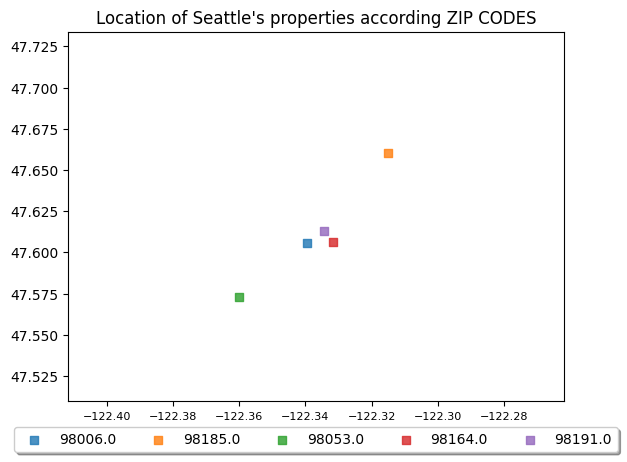

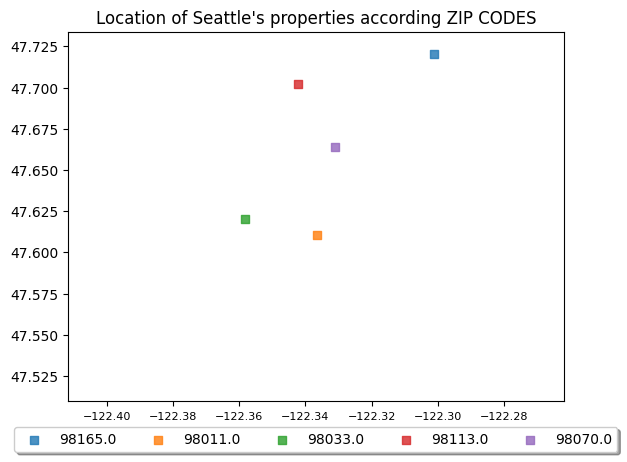

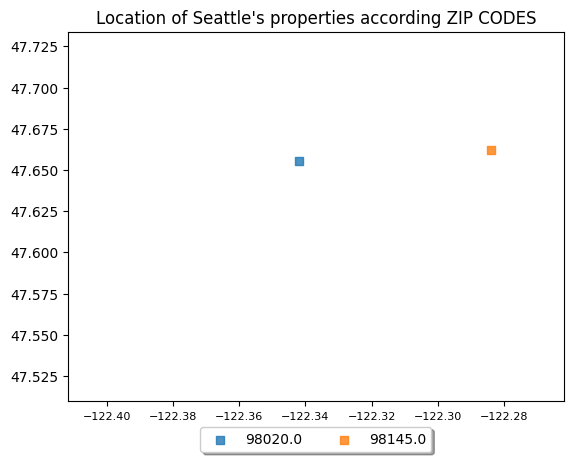

In [61]:
# Printing location with 5 different ZIP CODES each time.
# For all ZIP CODES
codes = data.ZipCode.value_counts().index
codes_chunks = chunk_list(codes, 5)
for codes_chunk in codes_chunks:
    for n, code in enumerate(codes_chunk):
        df = data.loc[data.ZipCode == code, :]
        plt.scatter(x=df.Longitude,
                y=df.Latitude,
                marker="s",
                alpha=0.8,
                color=palette[n],
                label=code)
    plt.xlim(min(data.Longitude), max(data.Longitude))
    plt.xticks(fontsize=8)
    plt.ylim(min(data.Latitude), max(data.Latitude))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                fancybox=True, shadow=True, ncol=5)
    plt.title(f"Location of Seattle's properties according ZIP CODES")
    plt.show()


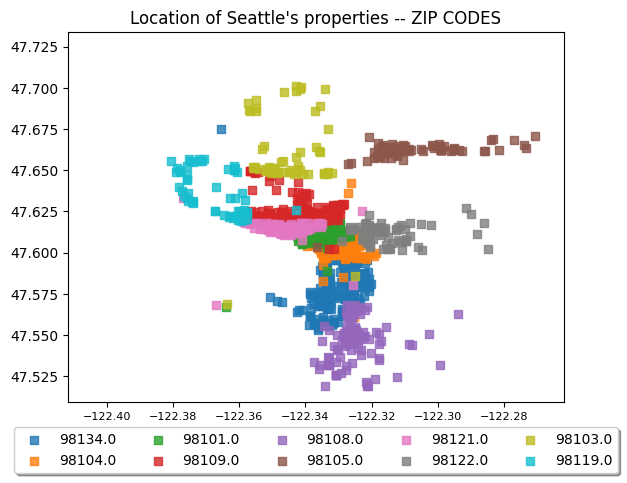

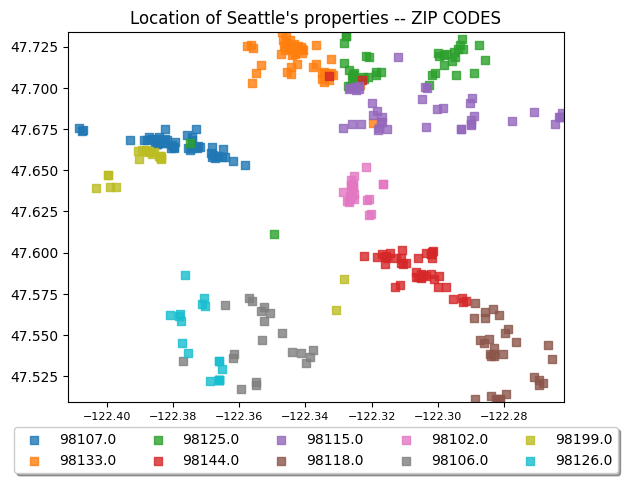

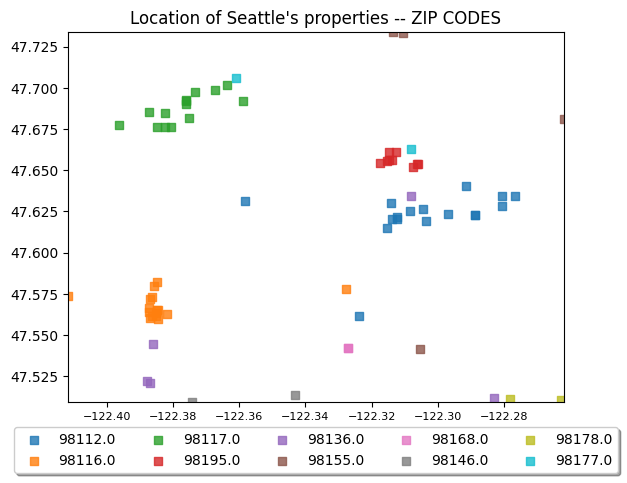

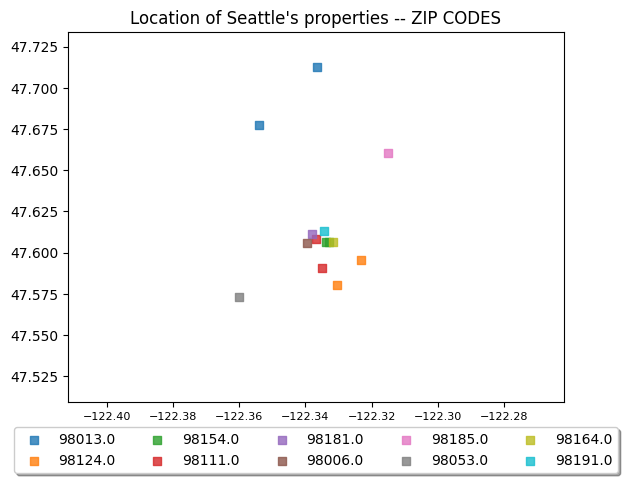

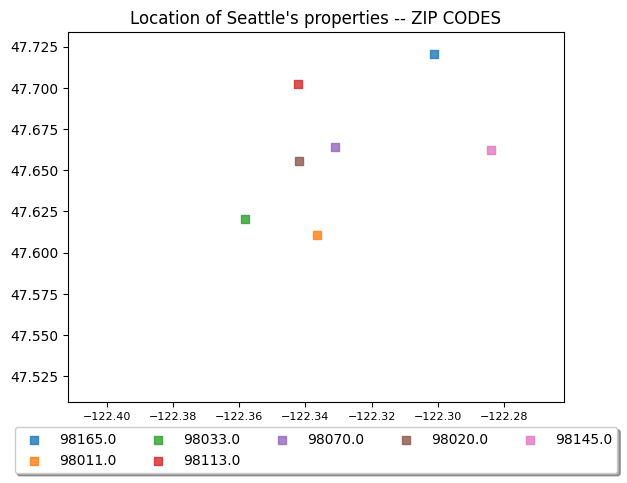

In [62]:
chunk_size = 10
palette = sns.color_palette('tab10', chunk_size)
codes = data.ZipCode.value_counts().index
codes_chunks = chunk_list(codes, chunk_size)
for codes_chunk in codes_chunks:
    for n, code in enumerate(codes_chunk):
        df = data.loc[data.ZipCode == code, :]
        plt.scatter(x=df.Longitude,
                y=df.Latitude,
                marker="s",
                alpha=0.8,
                color=palette[n],
                label=code)
    plt.xlim(min(data.Longitude), max(data.Longitude))
    plt.xticks(fontsize=8)
    plt.ylim(min(data.Latitude), max(data.Latitude))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                fancybox=True, shadow=True, ncol=5)
    plt.title(f"Location of Seattle's properties -- ZIP CODES")
    plt.show()

### 3.1.3.  [&#9650;](#toc0_) <a id='toc3_1_3_'></a>By CouncilDisctrictCode

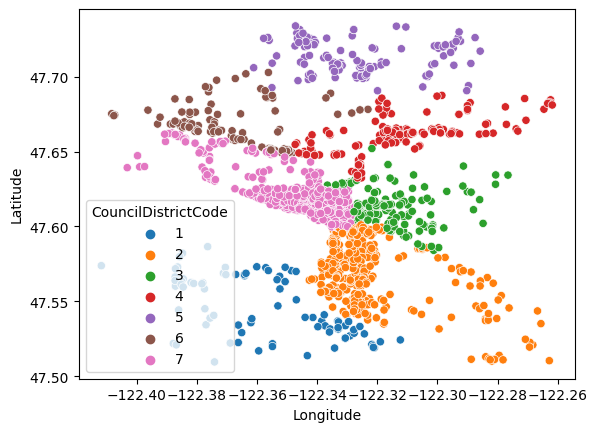

In [166]:
codes = data.CouncilDistrictCode.unique()
palette = sns.color_palette('tab10', len(codes))

sns.scatterplot(data=data, x='Longitude', y='Latitude',
                hue='CouncilDistrictCode',
                palette=sns.color_palette('tab10',7))
plt.show()

Finally, we find a simple and consistent indicator to group properties according to their location.

### 3.1.4.  [&#9650;](#toc0_) <a id='toc3_1_4_'></a>Properties' locations and EUI slices

### 3.1.5.  [&#9650;](#toc0_) <a id='toc3_1_5_'></a>Properties' locations and GHGEmissionsIntensity slices

## 3.2.  [&#9650;](#toc0_) <a id='toc3_2_'></a>Targets (or target intensity) and district code correlation

## 3.3.  [&#9650;](#toc0_) <a id='toc3_3_'></a>Targets and primary type correlation

## 3.4.  [&#9650;](#toc0_) <a id='toc3_4_'></a>Targets and number of floors correlation

## 3.5.  [&#9650;](#toc0_) <a id='toc3_5_'></a>Targets and number of floors correlation

# 4.  [&#9650;](#toc0_) <a id='toc4_'></a>Features engineering

In [174]:
data.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Age'],
      dtype='object')

## 4.1.  [&#9650;](#toc0_) <a id='toc4_1_'></a>Buildings' age

In [169]:
data['Age'] = 2023 - data.YearBuilt

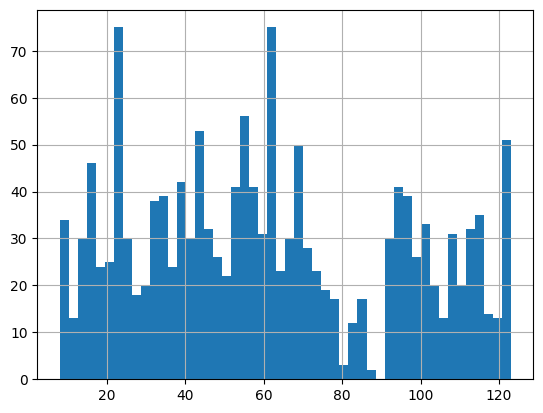

0

In [173]:
data.Age.hist(bins=50)
plt.show()
data.Age.isnull().sum()

## 4.2.  [&#9650;](#toc0_) <a id='toc4_2_'></a>Percentage of principal use type

Will be used to weight ones in the one hot encoder of use types?

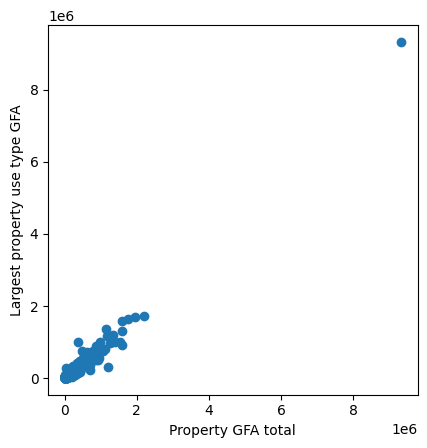

In [204]:
plt.scatter(data.PropertyGFATotal, data.LargestPropertyUseTypeGFA)
plt.xlabel('Property GFA total')
plt.ylabel('Largest property use type GFA')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

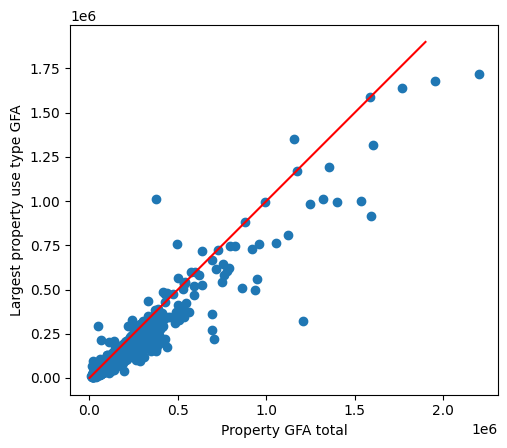

In [206]:
x = np.arange(0,2e6, 1e5)
df = data.loc[data.PropertyGFATotal < 6e6]
plt.scatter(df.PropertyGFATotal, df.LargestPropertyUseTypeGFA)
plt.plot(x,x, c='red')
plt.xlabel('Property GFA total')
plt.ylabel('Largest property use type GFA')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

There should not be points over the red line...

In [207]:
ft = 'ProportionPrincipalUseType'
data[ft] = (data.LargestPropertyUseTypeGFA
            / data.PropertyGFATotal)

In [208]:
data[ft].describe()

count    1483.000000
mean        0.864892
std         0.311073
min         0.186469
25%         0.681695
50%         0.943425
75%         1.000000
max         6.426849
Name: ProportionPrincipalUseType, dtype: float64

<AxesSubplot: >

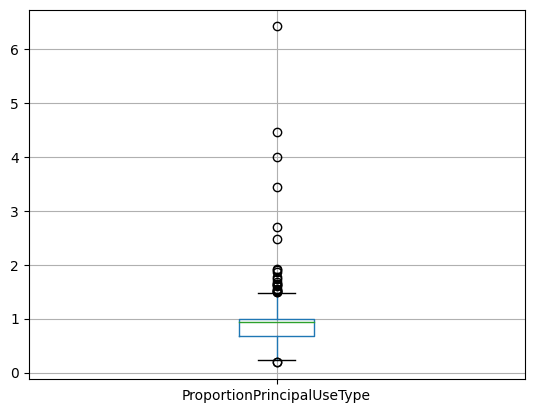

In [209]:
data.boxplot(ft)

In [210]:
(data.ProportionPrincipalUseType > 1).mean()*100

11.634162743779422

12 % exceed 1, which should not exist...

In [211]:
(data.ProportionPrincipalUseType > 1.05).mean()*100

6.52320107599193

In [217]:
# Computing percentage of each type loss using a threshold.
df =  data.loc[data.ProportionPrincipalUseType > 1.20]
df.PrimaryPropertyType.value_counts()*100/data.PrimaryPropertyType.value_counts()

Distribution Center             5.660377
High-Rise Multifamily                NaN
Hospital                       11.111111
Hotel                           1.369863
K-12 School                    12.000000
Laboratory                     12.500000
Large Office                    0.000000
Low-Rise Multifamily            0.000000
Medical Office                  8.108108
Mid-Rise Multifamily                 NaN
Mixed Use Property              1.020408
Office                               NaN
Other                           4.741379
Refrigerated Warehouse          9.090909
Residence Hall                  5.000000
Restaurant                      0.000000
Retail Store                    4.878049
Self-Storage Facility           0.000000
Senior Care Community           5.000000
Small- and Mid-Sized Office     1.449275
Supermarket / Grocery Store     0.000000
University                      0.000000
Warehouse                       2.197802
Worship Facility                5.882353
Name: PrimaryPro

In [218]:
# Computing percentage of each type loss using a threshold.
df =  data.loc[data.ProportionPrincipalUseType > 1.05]
df.PrimaryPropertyType.value_counts()*100/data.PrimaryPropertyType.value_counts()
       

Distribution Center             7.547170
High-Rise Multifamily                NaN
Hospital                       44.444444
Hotel                           5.479452
K-12 School                    20.000000
Laboratory                     12.500000
Large Office                    1.212121
Low-Rise Multifamily            0.000000
Medical Office                  8.108108
Mid-Rise Multifamily                 NaN
Mixed Use Property              1.020408
Office                               NaN
Other                           9.482759
Refrigerated Warehouse          9.090909
Residence Hall                  5.000000
Restaurant                      0.000000
Retail Store                    7.317073
Self-Storage Facility           0.000000
Senior Care Community           5.000000
Small- and Mid-Sized Office     5.434783
Supermarket / Grocery Store    10.526316
University                     12.500000
Warehouse                       4.395604
Worship Facility               10.294118
Name: PrimaryPro

<AxesSubplot: xlabel='NumberofFloors', ylabel='PercentagePrincipalUseType'>

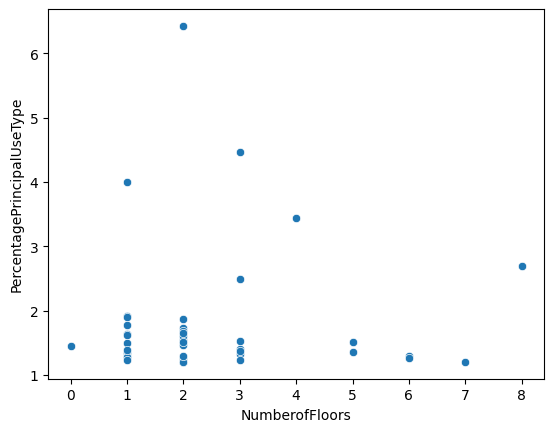

In [226]:
# Searching if GFA total was only considering the first floor
df = data.loc[data.PercentagePrincipalUseType > 1.2, ['NumberofFloors',
                                                      'PercentagePrincipalUseType']]
sns.scatterplot(data=df, x='NumberofFloors', y='PercentagePrincipalUseType')

Not correlated, so no...

May be I should discard elements with a ratio > threshold.
Threshold to be determined.

# 5.  [&#9650;](#toc0_) <a id='toc5_'></a>PCA

In [167]:
palette = sns.color_palette("bright", 10)

def display_circles(pca, axis_ranks, labels=None,
                    label_rotation=0, lims=None,
                    figsize=(8,8)):
    """Display correlation circles, one for each factorial plane"""
    pcs = pca.components_
    n_comp = pca.n_components_
    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=figsize)

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='12',
                                 ha='center', va='center',
                                 rotation=label_rotation, color="blue",
                                 alpha=0.75)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, figsize=(6,6)):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''
    n_comp = pca.n_components_
    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=figsize)
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var)[::-1]:
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend(fontsize=20)

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            xmin = np.min(X_projected[:, [d1]]) * 1.1
            xmax = np.max(X_projected[:, [d1]]) * 1.1
            ymin = np.min(X_projected[:, [d2]]) * 1.1
            ymax = np.max(X_projected[:, [d2]]) * 1.1
            plt.xlim([xmin, xmax])
            plt.ylim([ymin, ymax])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)), size=18)
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)), size=18)

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1), size=22)
            #plt.show(block=False)
   
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    fig, ax = plt.subplots(figsize=(7,5))
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    plt.yticks(np.arange(0, 100+1, 10))
    plt.title("Scree plot")
    plt.show(block=False)

In [227]:
data.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Age',
       'Building(s)Per

In [230]:
pca_fts = ['SteamUse(kBtu)',
           'Electricity(kBtu)',
           'NaturalGas(kBtu)',
           'SiteEnergyUse(kBtu)',
           'PropertyGFABuilding(s)',
           'PropertyGFATotal',
           'PropertyGFAParking',    
           'CouncilDistrictCode',
           'Age',
           'NumberofFloors',
           'NumberofBuildings',
           'SiteEUI(kBtu/sf)',
           'SourceEUI(kBtu/sf)',
           'TotalGHGEmissions']

df = data.loc[: , pca_fts]
df.notnull().mean()

SteamUse(kBtu)            1.0
Electricity(kBtu)         1.0
NaturalGas(kBtu)          1.0
SiteEnergyUse(kBtu)       1.0
PropertyGFABuilding(s)    1.0
PropertyGFATotal          1.0
PropertyGFAParking        1.0
CouncilDistrictCode       1.0
Age                       1.0
NumberofFloors            1.0
NumberofBuildings         1.0
SiteEUI(kBtu/sf)          1.0
SourceEUI(kBtu/sf)        1.0
TotalGHGEmissions         1.0
dtype: float64

In [233]:
df.shape

(1487, 14)

array([[<AxesSubplot: title={'center': 'SteamUse(kBtu)'}>,
        <AxesSubplot: title={'center': 'Electricity(kBtu)'}>],
       [<AxesSubplot: title={'center': 'NaturalGas(kBtu)'}>,
        <AxesSubplot: title={'center': 'SiteEnergyUse(kBtu)'}>],
       [<AxesSubplot: title={'center': 'PropertyGFABuilding(s)'}>,
        <AxesSubplot: title={'center': 'PropertyGFATotal'}>],
       [<AxesSubplot: title={'center': 'PropertyGFAParking'}>,
        <AxesSubplot: title={'center': 'CouncilDistrictCode'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'NumberofFloors'}>],
       [<AxesSubplot: title={'center': 'NumberofBuildings'}>,
        <AxesSubplot: title={'center': 'SiteEUI(kBtu/sf)'}>],
       [<AxesSubplot: title={'center': 'SourceEUI(kBtu/sf)'}>,
        <AxesSubplot: title={'center': 'TotalGHGEmissions'}>]],
      dtype=object)

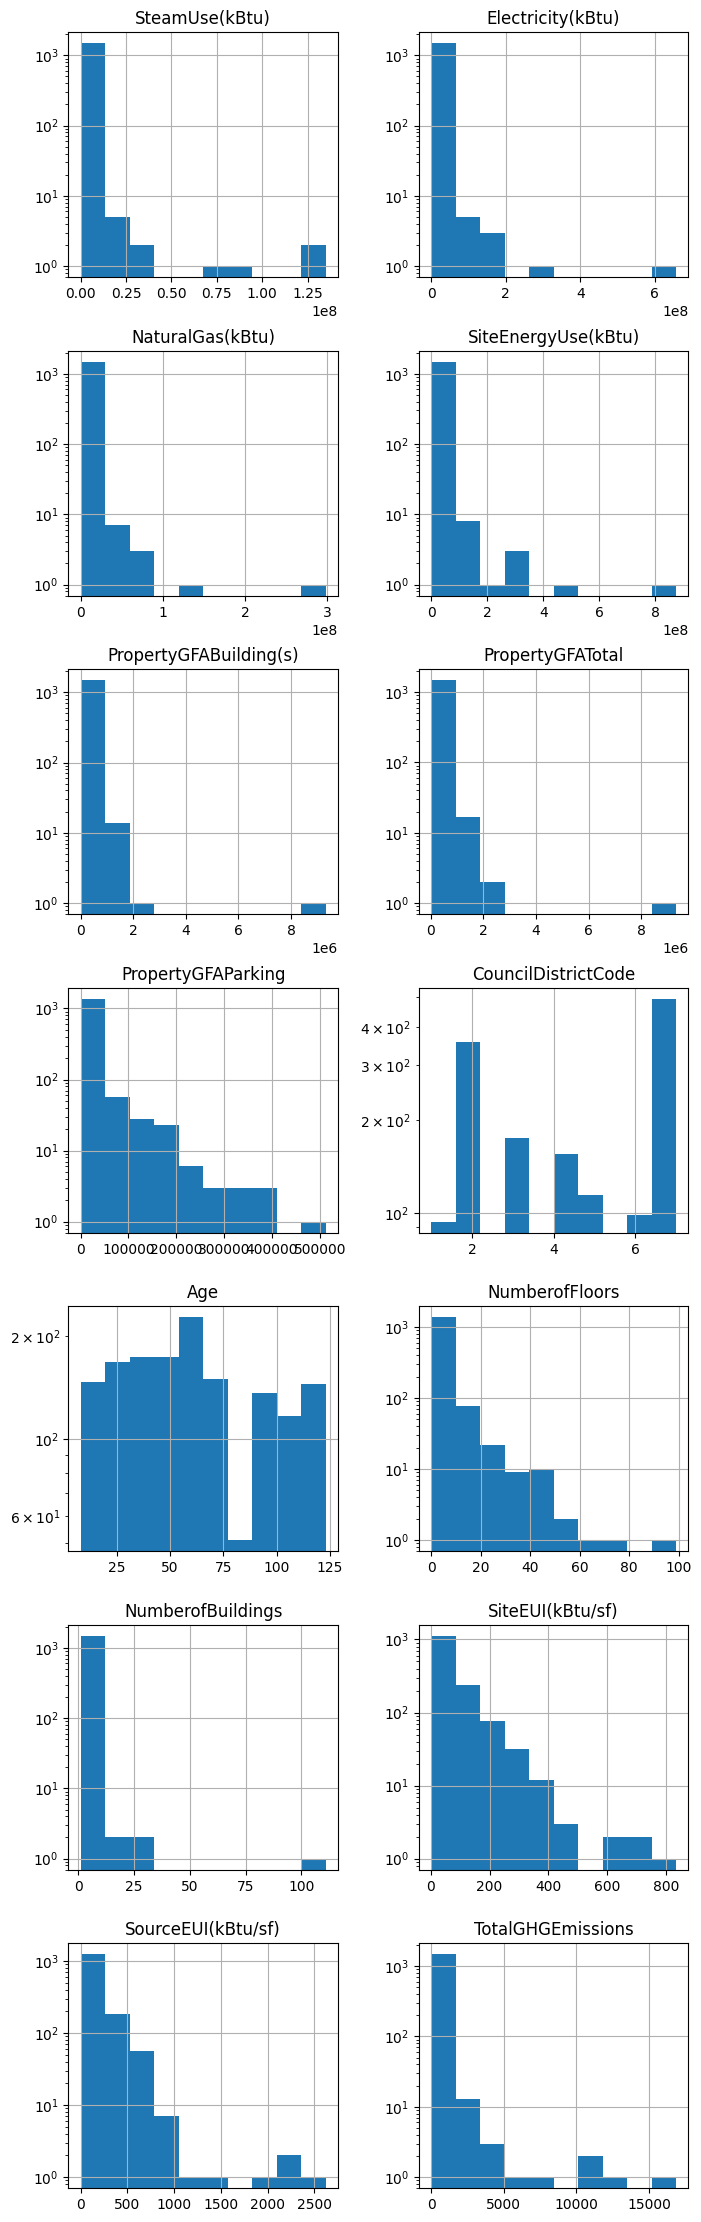

In [237]:
df.hist(figsize=(8,28),layout=(7,2), log=True)

In [238]:
data.loc[data.NumberofBuildings>100]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Age,Building(s)PercentagePrincipalUseType,PercentagePrincipalUseType,ProportionPrincipalUseType
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111,0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,93.800003,0.0,246.600006,0.0,873923712.0,0.0,84985240.0,657074389.0,0.0,False,Compliant,NaN,11140.56,1.2,123,1.0,1.0,1.0
